#  Hit Analysis

En Este notebook se realizará un estudio de todos los hits obtenidos y extraeremos información interesante.

Lo primero, vamos a dar una breve descripción de las características que tenemos en el dataset:
- <b>artist</b>: Indica el artista de la canción.
- <b>title</b>: Titulo de la canción.
- <b>id</b>: Identificador que da spotify a la canción.
- <b>year_chart</b>: Año de aparición de la canción en la lista Hot-100.
- <b>date_chart</b>: Fecha aparición en la lista Hot-100.
- <b>release_date</b>: Fecha de lanzamiento de la canción.
- <b>collaboration</b>: Indica si en la canción intervienen más artistas que el principal.
- <b>rank</b>: Indica el puesto en el ranking para la fecha de aparición (date_chart).
- <b>weeks</b>: Número de semanas de la canción siendo la última semana contabilizada la de la fecha de aparición (date_chart).
- <b>isNew</b>: Indica si una canción es la primera vez que aparece en la lista.
- <b>peakPos</b> : Indica posición más alta en el ranking hasta la fecha.
- <b>lastPos</b>: Indica posición en el ranking de la semana anterior.
- <b>danceability</b>: Describe qué tan adecuada es una canción para bailar basándose en una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.
- <b>energy</b>: Representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas.
- <b>key</b>: La clave general estimada de la pista.
- <b>loudness</b>: El volumen general de una pista en decibelios (dB).
- <b>mode</b>: Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.
- <b>speechiness</b>: Detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida a un discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor.
- <b>acousticness</b>: Una medida de confianza de 0.0 a 1.0 de sí la pista es acústica.
- <b>instrumentalness</b>: Predice si una pista no contiene voces. Los sonidos “Ooh” y “aah” se tratan como instrumentales en este contexto.
- <b>liveness</b>: Detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo.
- <b>valence</b>: Describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, feliz, alegre, eufórico), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, triste, deprimido, enojado).
- <b>tempo</b>: El tempo global estimado de una pista en pulsaciones por minuto (BPM).
- <b>time Signature</b>: Una signatura de tiempo total estimada de una pista. El compás (metro) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás).
- <b>duration_ms</b>: La duración de la pista en milisegundos.
- <b>popularity_artist</b>: La popularidad del artista. El valor estará entre 0 y 100, siendo 100 el más popular. La popularidad del artista se calcula a partir de la popularidad de todas las pistas del artista en spotify.
- <b>popularity_song</b>: La popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones.
- <b>genres</b>: Una lista de los géneros con los que está asociado el artista.
- <b>album</b>: Nombre del álbum al que pertenece la canción.
- <b>label</b>: Sello discográfico del álbum.

A continuación se irán explicando los resultados obtenidos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import altair as alt
import dataframe_image as dfi
plt.rcParams['figure.figsize'] = 9,7

Primera visión del dataset

In [2]:
df_hits = pd.read_csv ("../Data/top_100_Billboard_1958_2020.csv",dtype={'song_lyrics':'string'})

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_hits.head()

,artist,title,id,year_chart,date_chart,release_date,collaboration,rank,weeks,isNew,peakPos,lastPos,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity_artist,popularity_song,genres,album,label,song_lyrics
0,Ricky Nelson,Poor Little Fool - Remastered,5ayybTSXNwcarDtxQKqvWX,1958,1958-08-04,1958-07-01,False,1,1,True,1,0,0.474,0.338,0,-11.528,1,0.0299,0.6480,0.000000,0.130,0.810,154.596,4,153933,58,50,"['adult standards', 'brill building pop', 'bub...",Ricky Nelson (Expanded Edition / Remastered),Capitol Records,<NA>
1,Bobby Darin,Splish Splash,40fD7ct05FvQHLdQTgJelG,1958,1958-08-04,1958,False,3,1,True,3,0,0.645,0.943,0,-1.526,1,0.0393,0.3850,0.000000,0.370,0.965,147.768,4,131719,63,59,"['adult standards', 'brill building pop', 'eas...",Bobby Darin,Rhino Atlantic,<NA>
2,The Coasters,Yakety Yak,7demHL0GXA6YmTNqw3Btz8,1958,1958-08-04,2005-12-20,False,7,1,True,7,0,0.715,0.669,7,-9.491,1,0.1280,0.7050,0.000732,0.044,0.976,120.789,4,113040,54,58,"['adult standards', 'brill building pop', 'doo...",Rhino Hi-Five: The Coasters,Rhino/Elektra,<NA>
3,Jack Scott,My True Love,2Un1O9CChp4wyTmt422XwW,1958,1958-08-04,1990-03-12,False,8,1,True,8,0,0.548,0.253,4,-11.387,1,0.0279,0.8710,0.000099,0.138,0.238,68.184,3,165026,33,26,"['brill building pop', 'canadian rockabilly', ...",Jack Scott's Greatest Hits,Curb Records,<NA>
4,Johnny Otis Show,Willie And The Hand Jive,4ToAe9XCKjFGin2Qfswwis,1958,1958-08-04,1989-01-01,False,9,1,True,9,0,0.778,0.814,6,-8.970,1,0.1400,0.0989,0.000008,0.180,0.921,98.857,4,154733,34,28,"['jazz blues', 'jump blues', 'rhythm and blues...",The Capitol Years,Capitol Records,<NA>


In [5]:
len(df_hits)

300642

Para todos los años, vemos el numero de *hits* total obtenido desde 1958 hasta ahora.

In [6]:
df_hits_uniq = df_hits.sort_values("weeks", ascending=False).drop_duplicates(subset = ["id"])
df_hits_uniq = df_hits_uniq.drop_duplicates(subset = ["artist","title"], keep="first")

In [7]:
len(df_hits_uniq)

25570

Hemos conseguido obtener un total de 25570. Hay que tener en cuenta que el total real será mayor, ya que no se han podido generar todos los datos para todos los *hits*, o porque no se ha podido extraer la información de spotipy, o se han descartado por motivos ya comentados en el cuaderno 2_data_hits_fusion.

## Boxplot por año
- Graficamos con un boxplot cada uno de los años para así ver la evolución de cada una de las caracteristicas en el tiempo

### Bailabilidad (*danceability*)

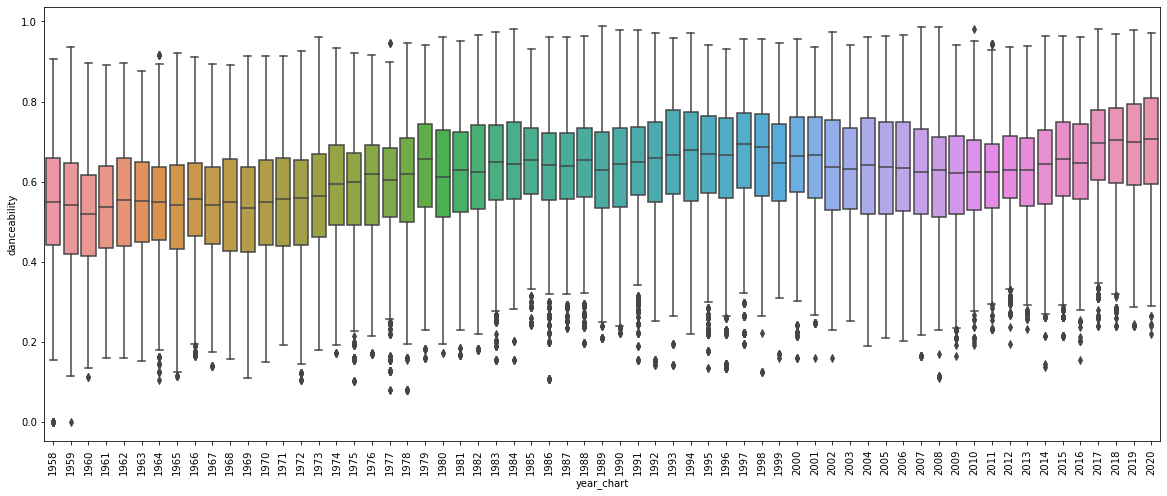

In [8]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="danceability",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Como se puede observar, se puede apreciar como la bailabilidad en los *hits* ha aumentado ligeramente desde el año 1958.

### Energia (*energy*)

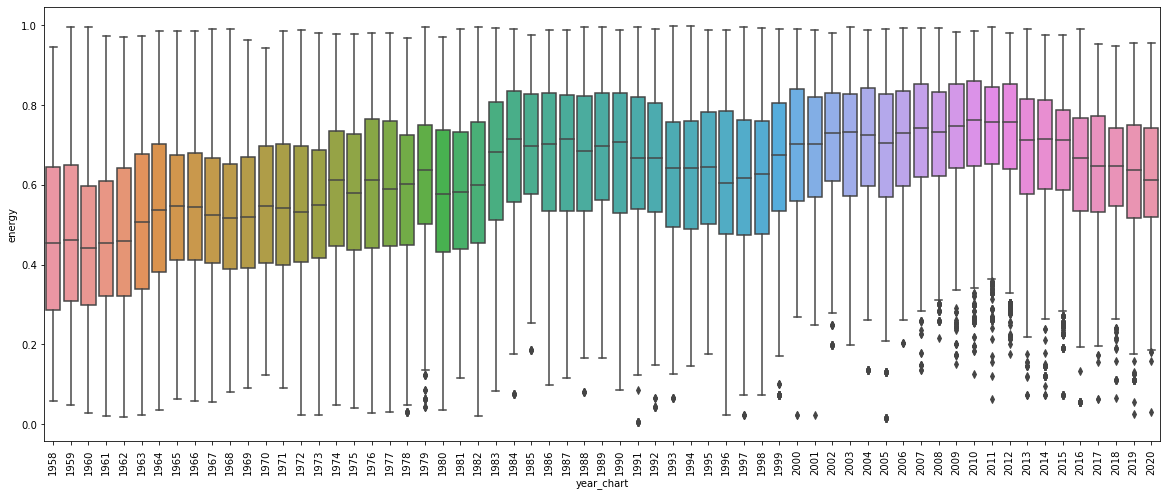

In [9]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart  = sns.boxplot(x="year_chart",y="energy",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Podemos observar también, como la tendencia a lo largo del tiempo en los hits ha sido hacia canciones ligeramente más enérgicas, aunque también se pueden apreciar excepciones.

### Clave musical (*key*)

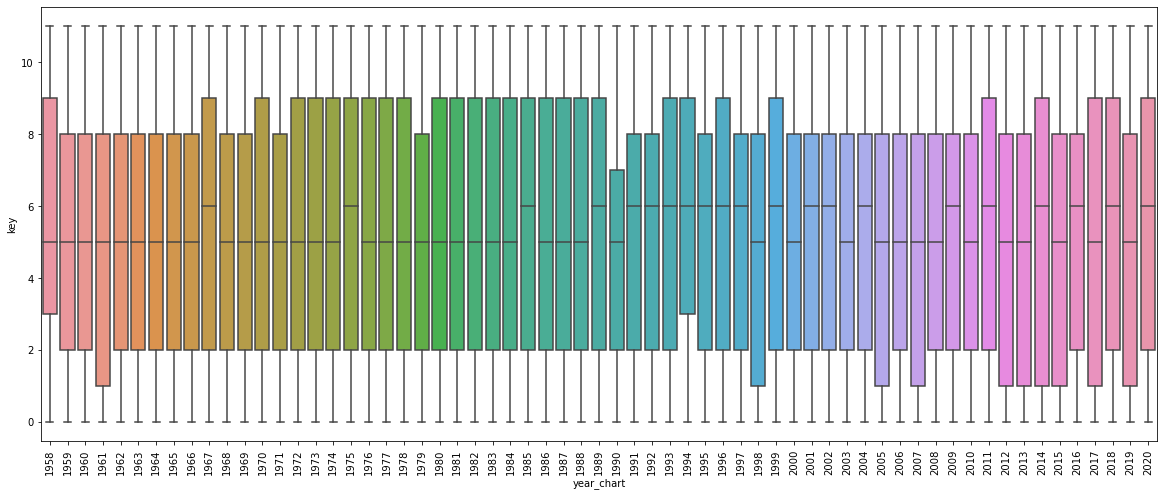

In [10]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="key",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

En cuanto a la clave musical, no podemos extraer ninguna conclusión clara en la evolución de esta característica a lo largo del tiempo.

### Volumen (*loudness*)

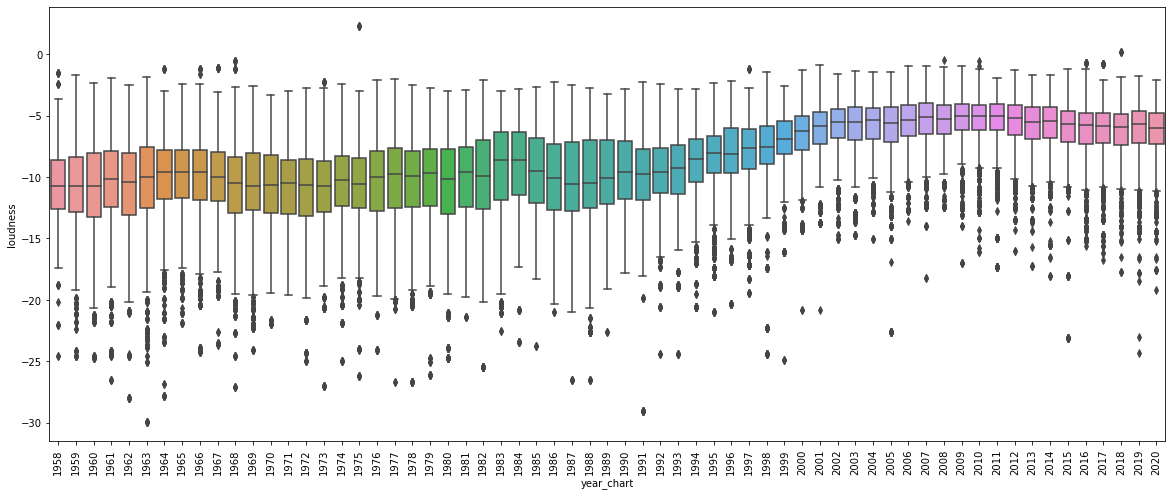

In [11]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="loudness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Respecto al volumen, podemos apreciar como el rango en el que nos movemos en la actualidad es menor que en el pasado y generalmente la tendencia es hacia de canciones con más volumen. 

### Habla (*speechiness*)

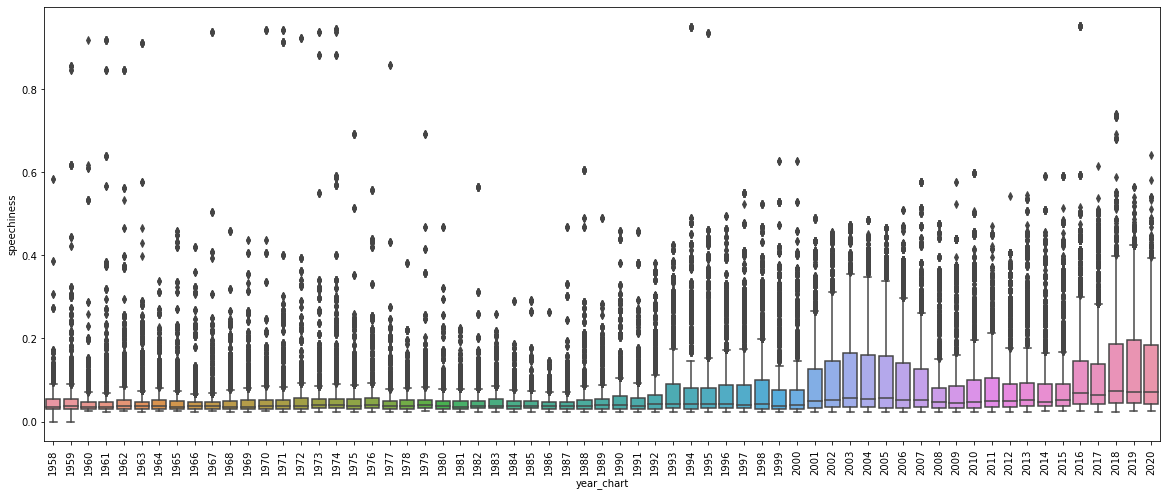

In [12]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="speechiness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Podemos observar, una evolución en el uso del habla en las canciones a partir de 1992/1993, se puede apreciar una mayor cantidad de uso del habla en las canciones, seguramente como veremos en futuros gráficos por la aparición en los *hits* de la música urbana, con ello el rap que hacen mucho uso de esta característica.

### Acústica musical (*acousticness*)

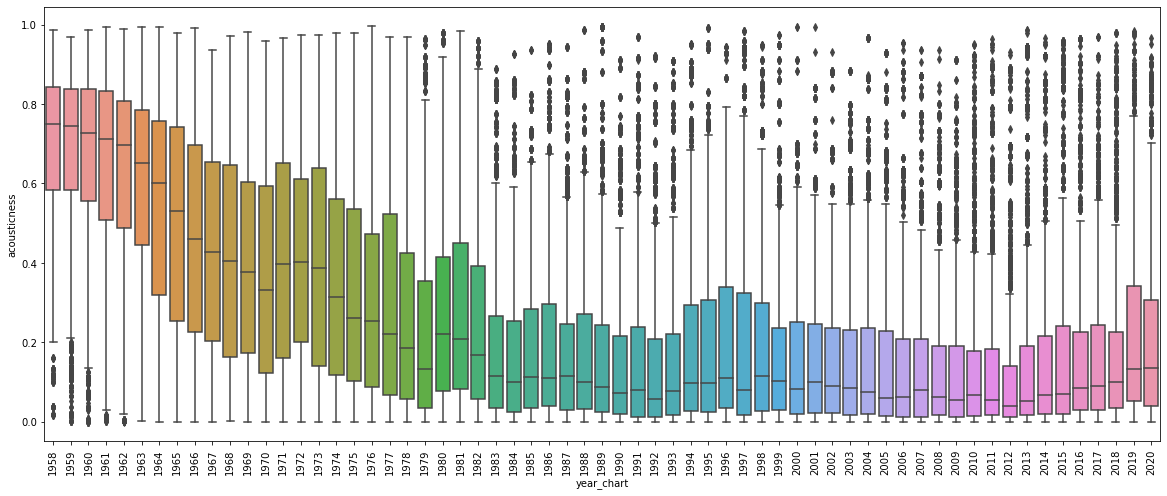

In [13]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="acousticness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Respecto a la acústica musical, se puede apreciar claramente como la tendencia ha sido hacia *hits* menos acústicos, aunque seguimos encontrando *hits* acústicos en la actualidad.

### Instrumentalidad (*instrumentalness*) 

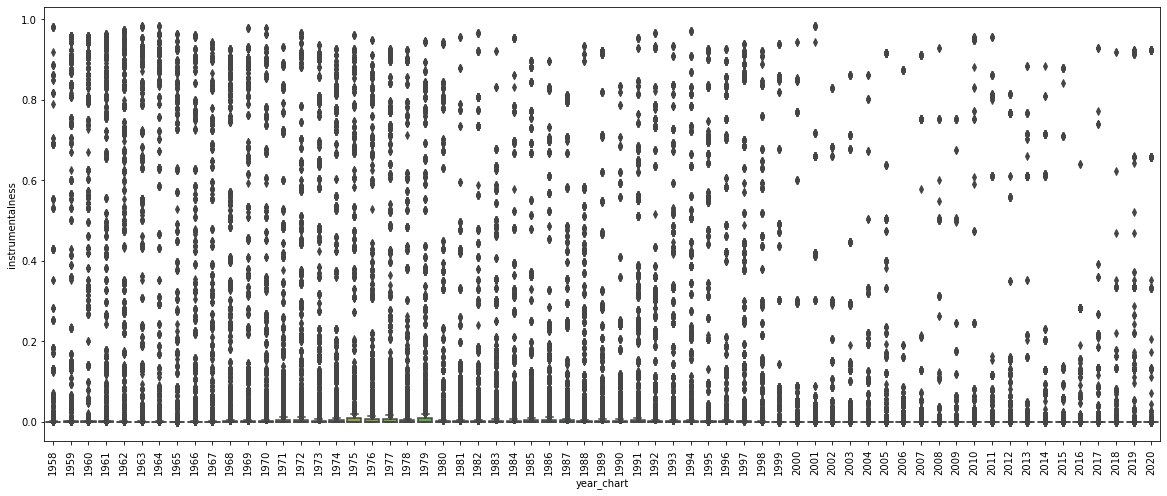

In [14]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="instrumentalness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Aunque el grueso de los *hits* presentan poca instrumentalidad en general, existen *hits* que se mueven dentro de todo el rango, pero podemos apreciar como a partir del año 1999, se aprecia una menor cantidad de *hits* que hacen uso de esta caracteristica.

### Vivacidad (*liveness*) 

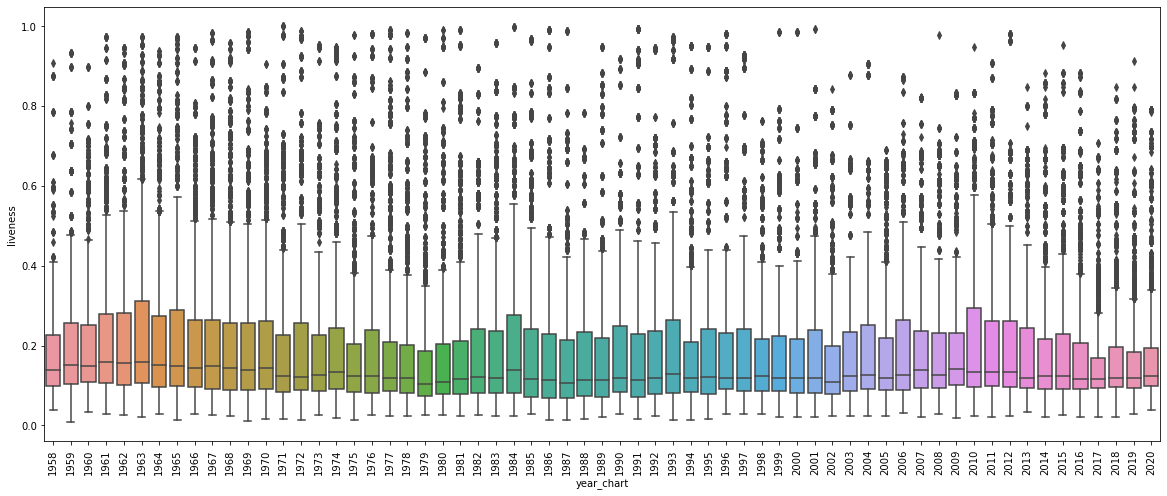

In [15]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="liveness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Respecto a la vivacidad, no se aprecia ninguna evolución reseñable.

### Valencia (*valence*)

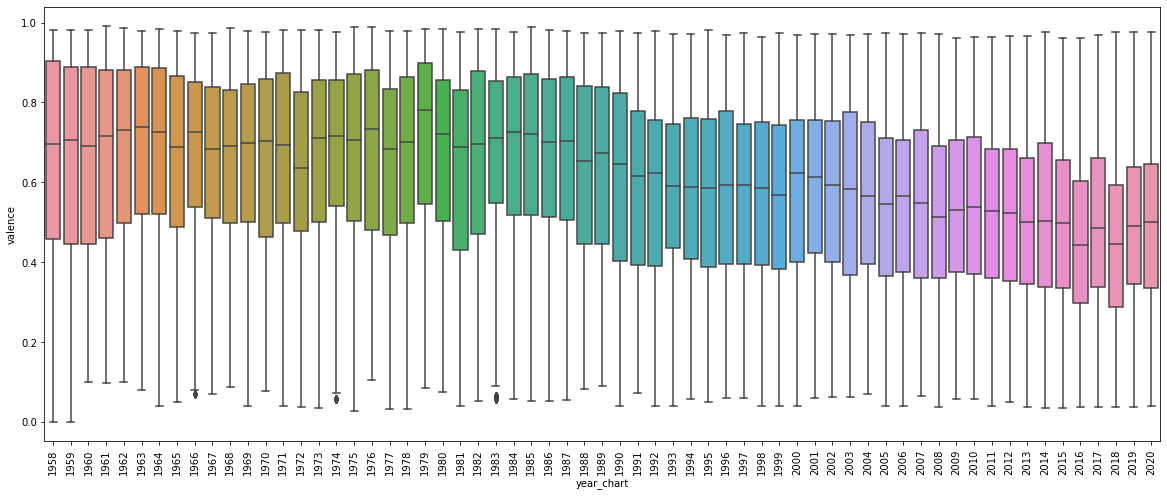

In [16]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart  = sns.boxplot(x="year_chart",y="valence",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Respecto la valencia, durante todos los años nos movemos en rangos similares, prácticamente en todo el rango posible. Si podemos apreciar un pequeño descenso de esta característica en el grueso de las canciones de cada año.

### Tempo (*tempo*)

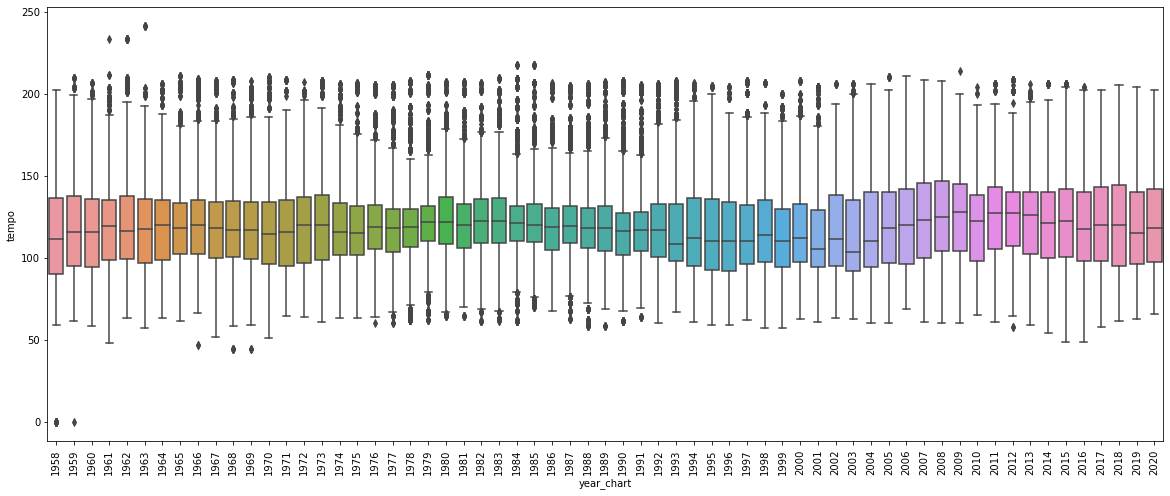

In [17]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart  = sns.boxplot(x="year_chart",y="tempo",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Respecto a esta característica no podemos apreciar ninguna evolución clara a lo largo del tiempo.

## boxplot por meses
- Para cada característica graficamos un boxplox por meses de los últimos 20 años, para ver si existen variaciones significativas según meses.

### Bailabilidad (*danceability*)

In [18]:
df_hits['date_chart'] = pd.to_datetime(df_hits['date_chart'])

In [19]:
df_hits.insert(4, 'mon_chart', df_hits['date_chart'].dt.strftime('%b'))

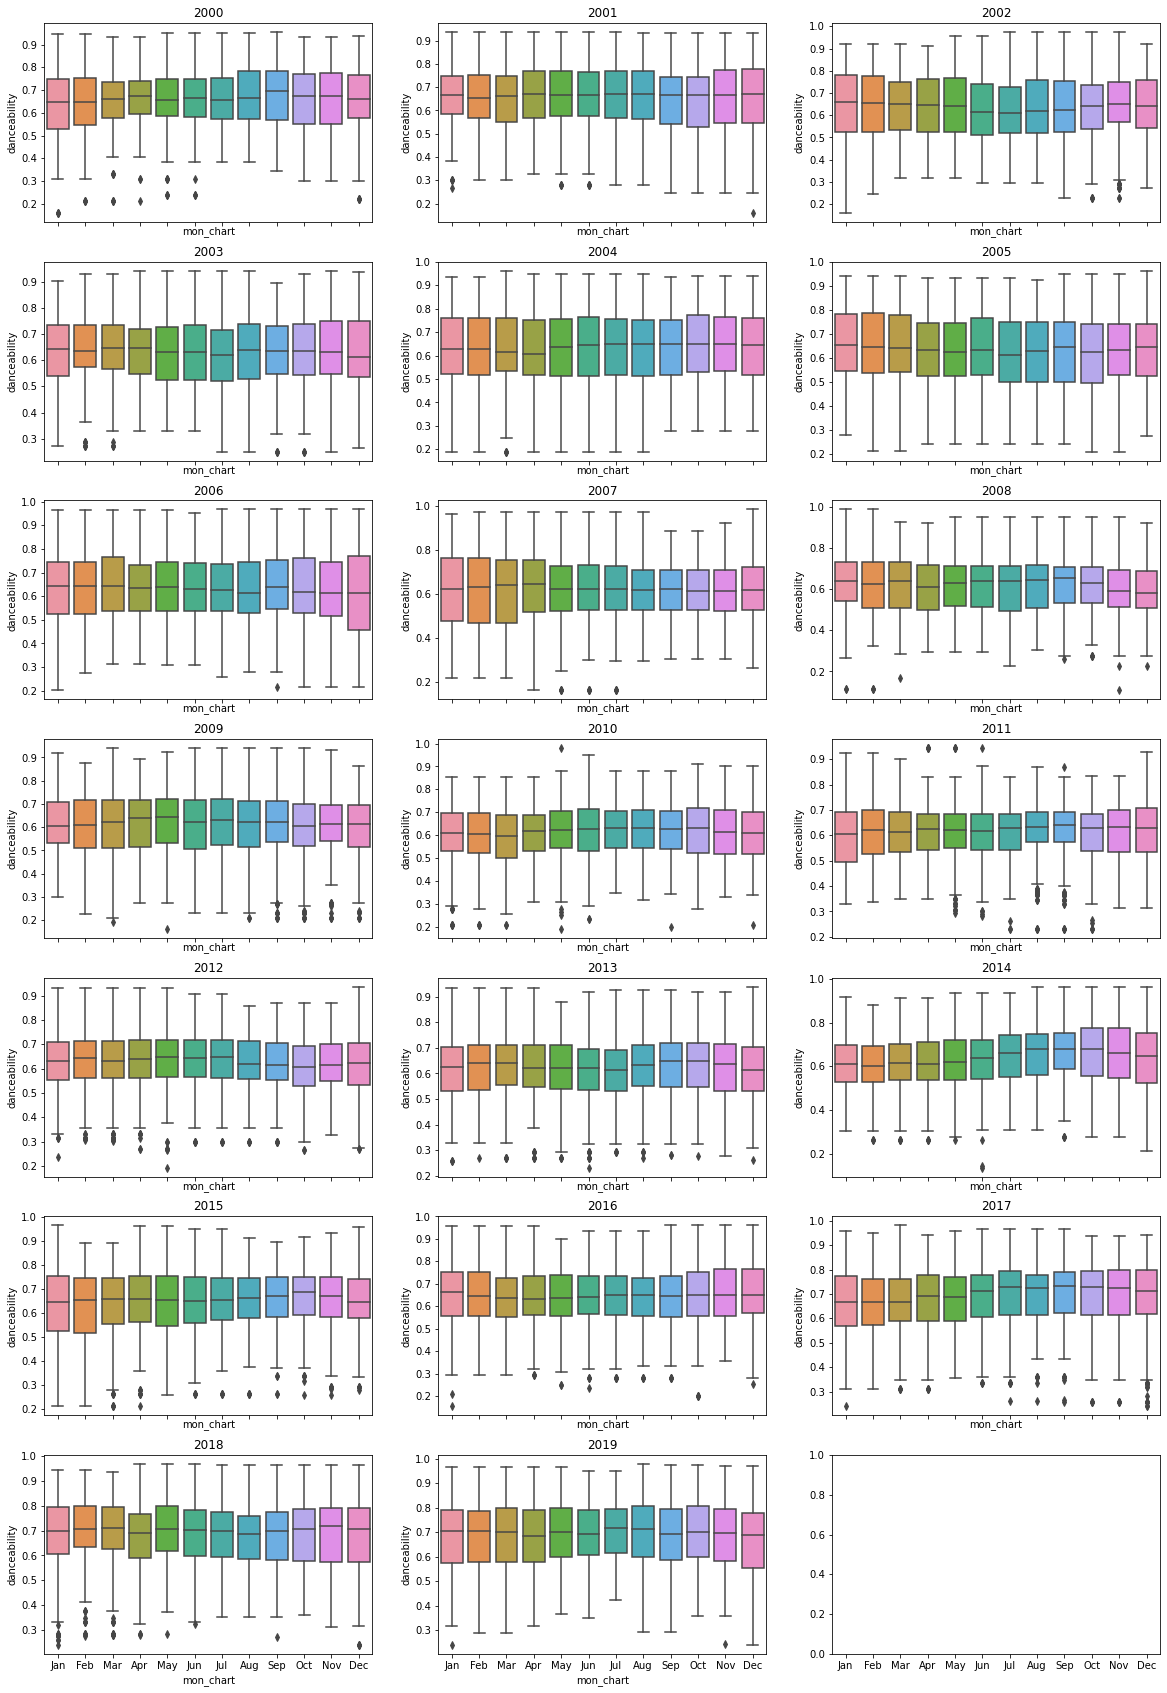

In [20]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Energia (*energy*)

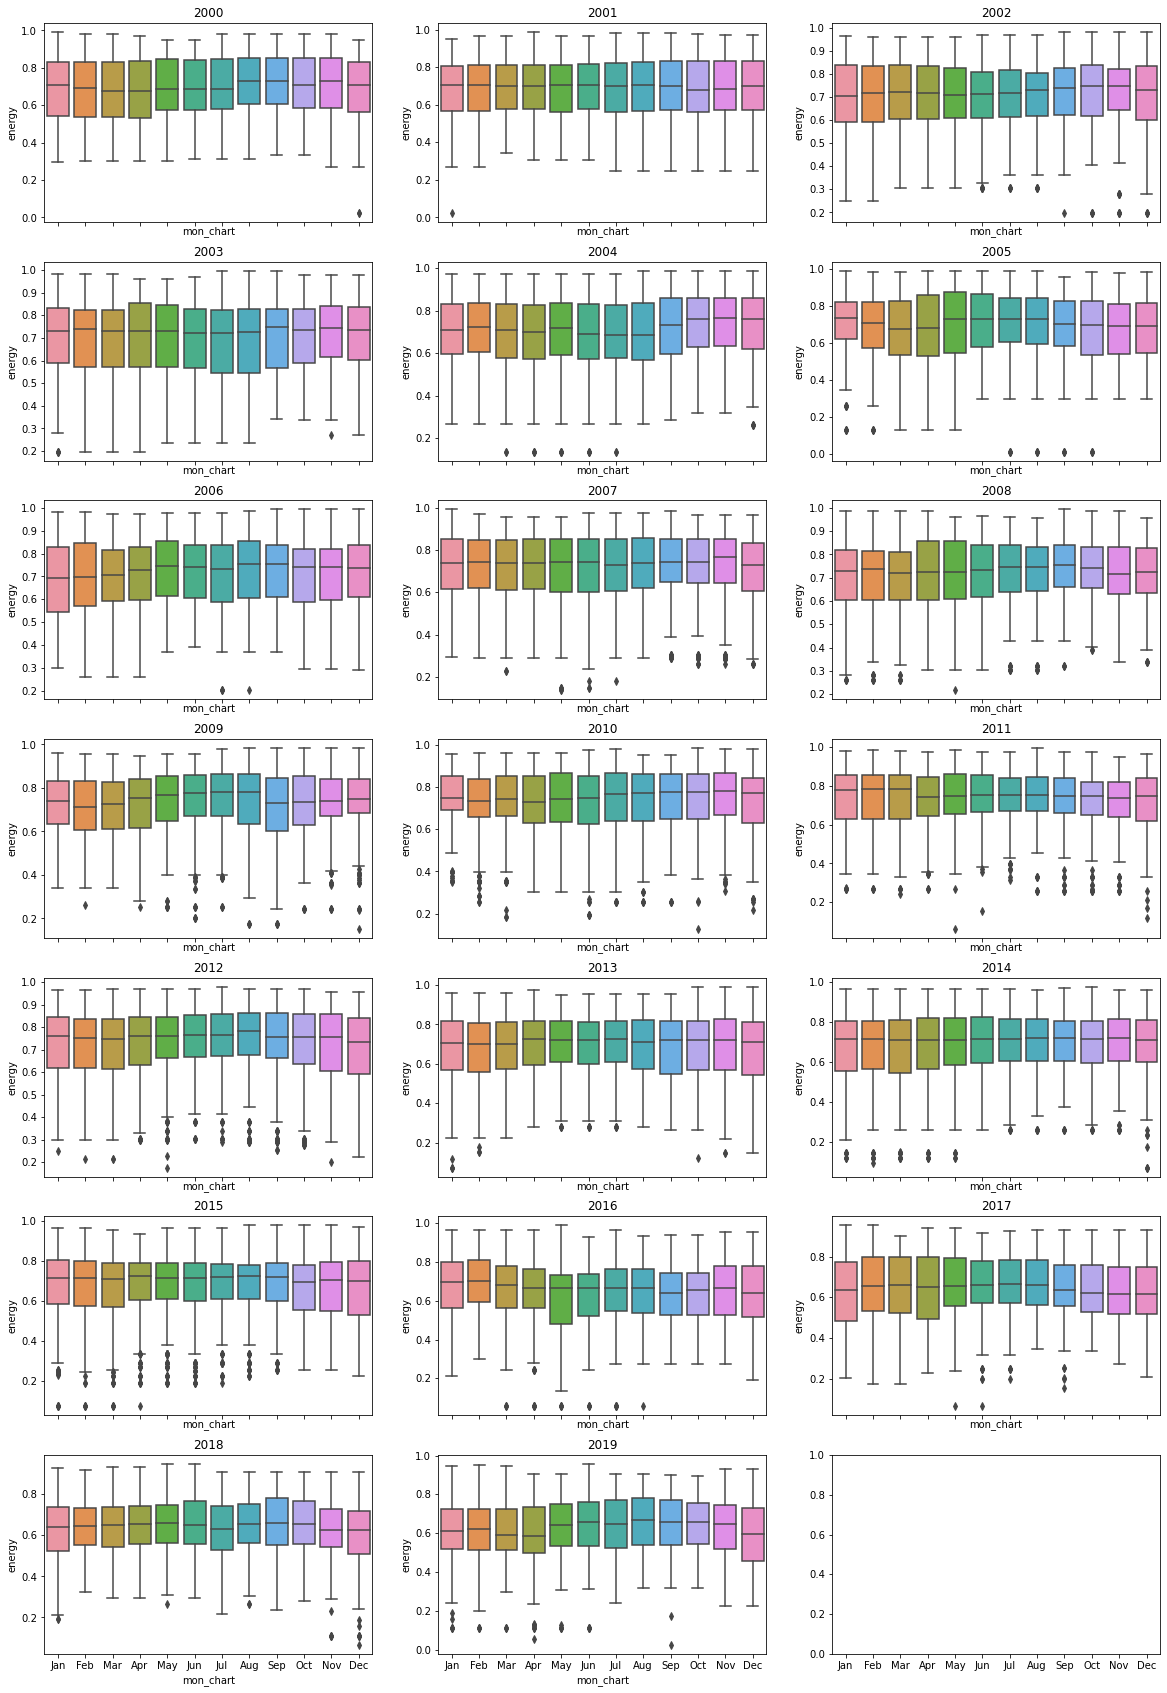

In [21]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Clave musical (*key*)

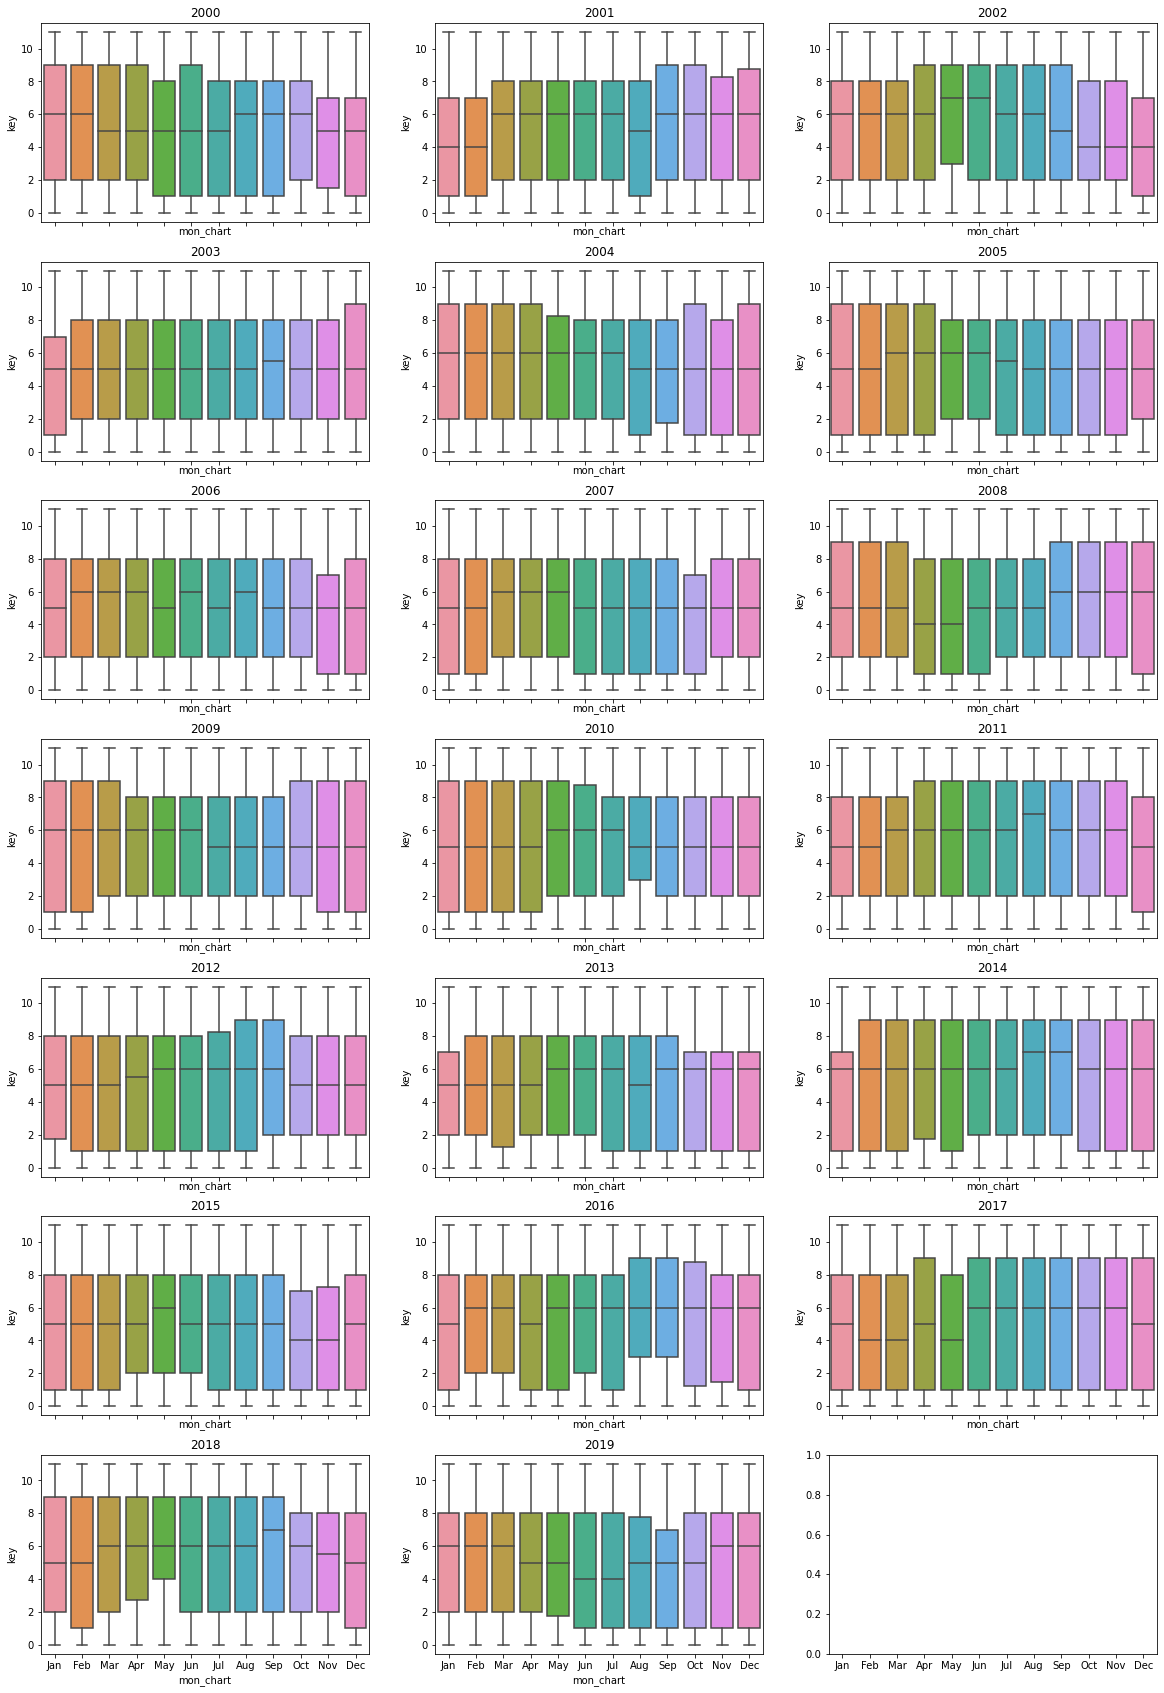

In [22]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Volumen (*loudness*)

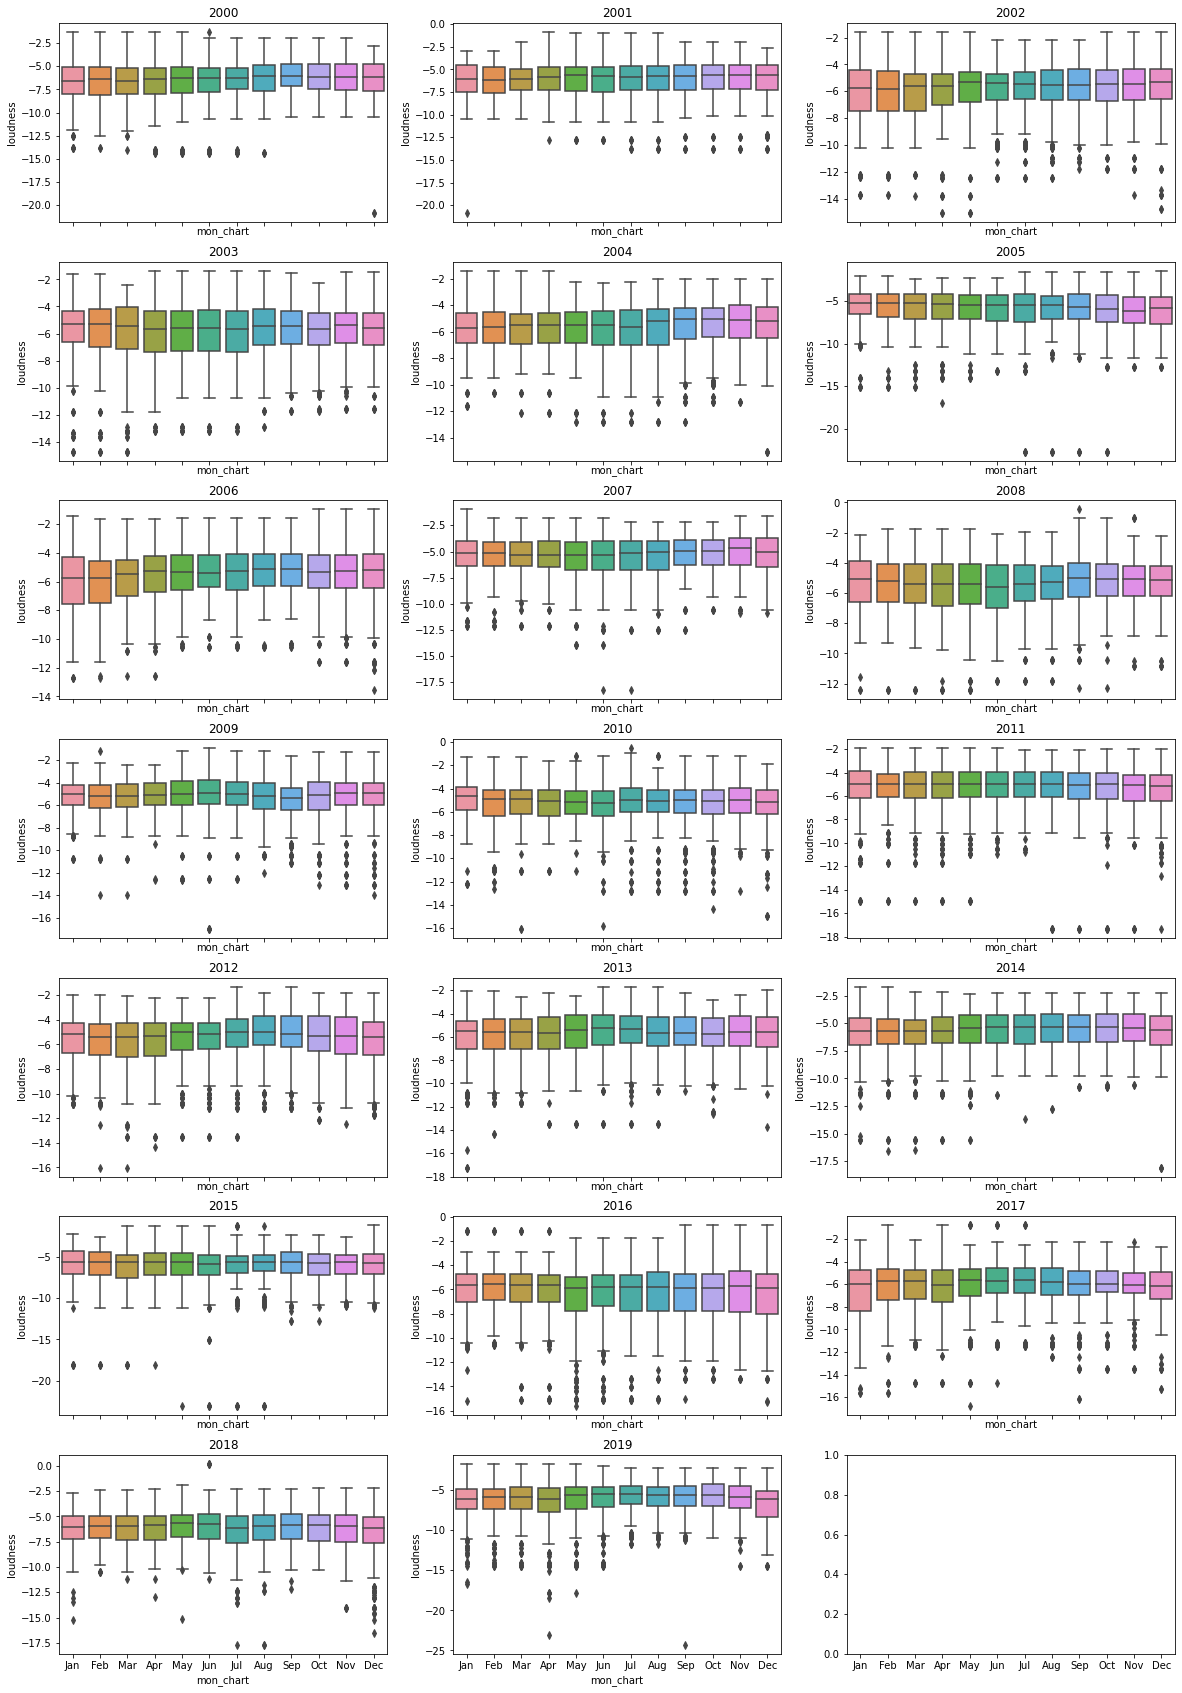

In [23]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Habla (*speechiness*)

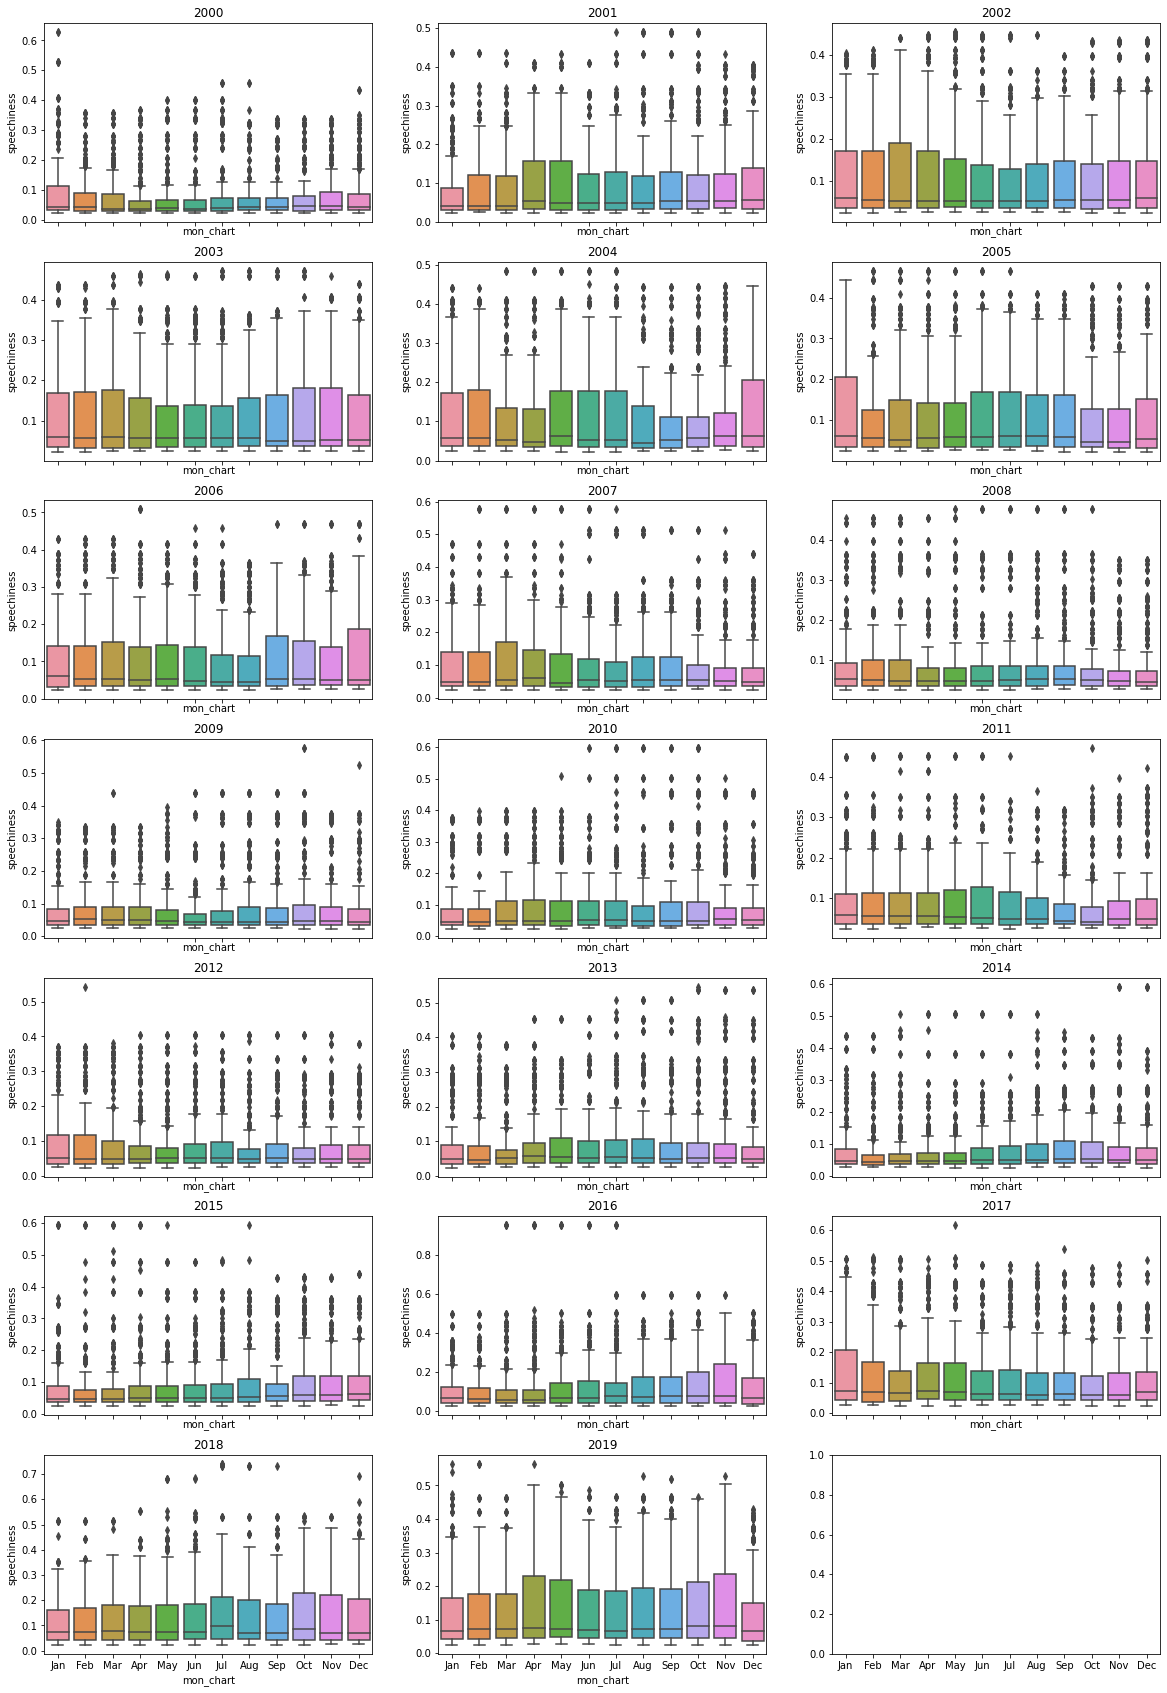

In [24]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones. Solo podemos apreciar que en los últimos años se hace mayor uso sel habla en las canciones, seguramente como ya se comentó debido al importante éxito de los géneros urbanos.

### Acoustica musical (*acousticness*)

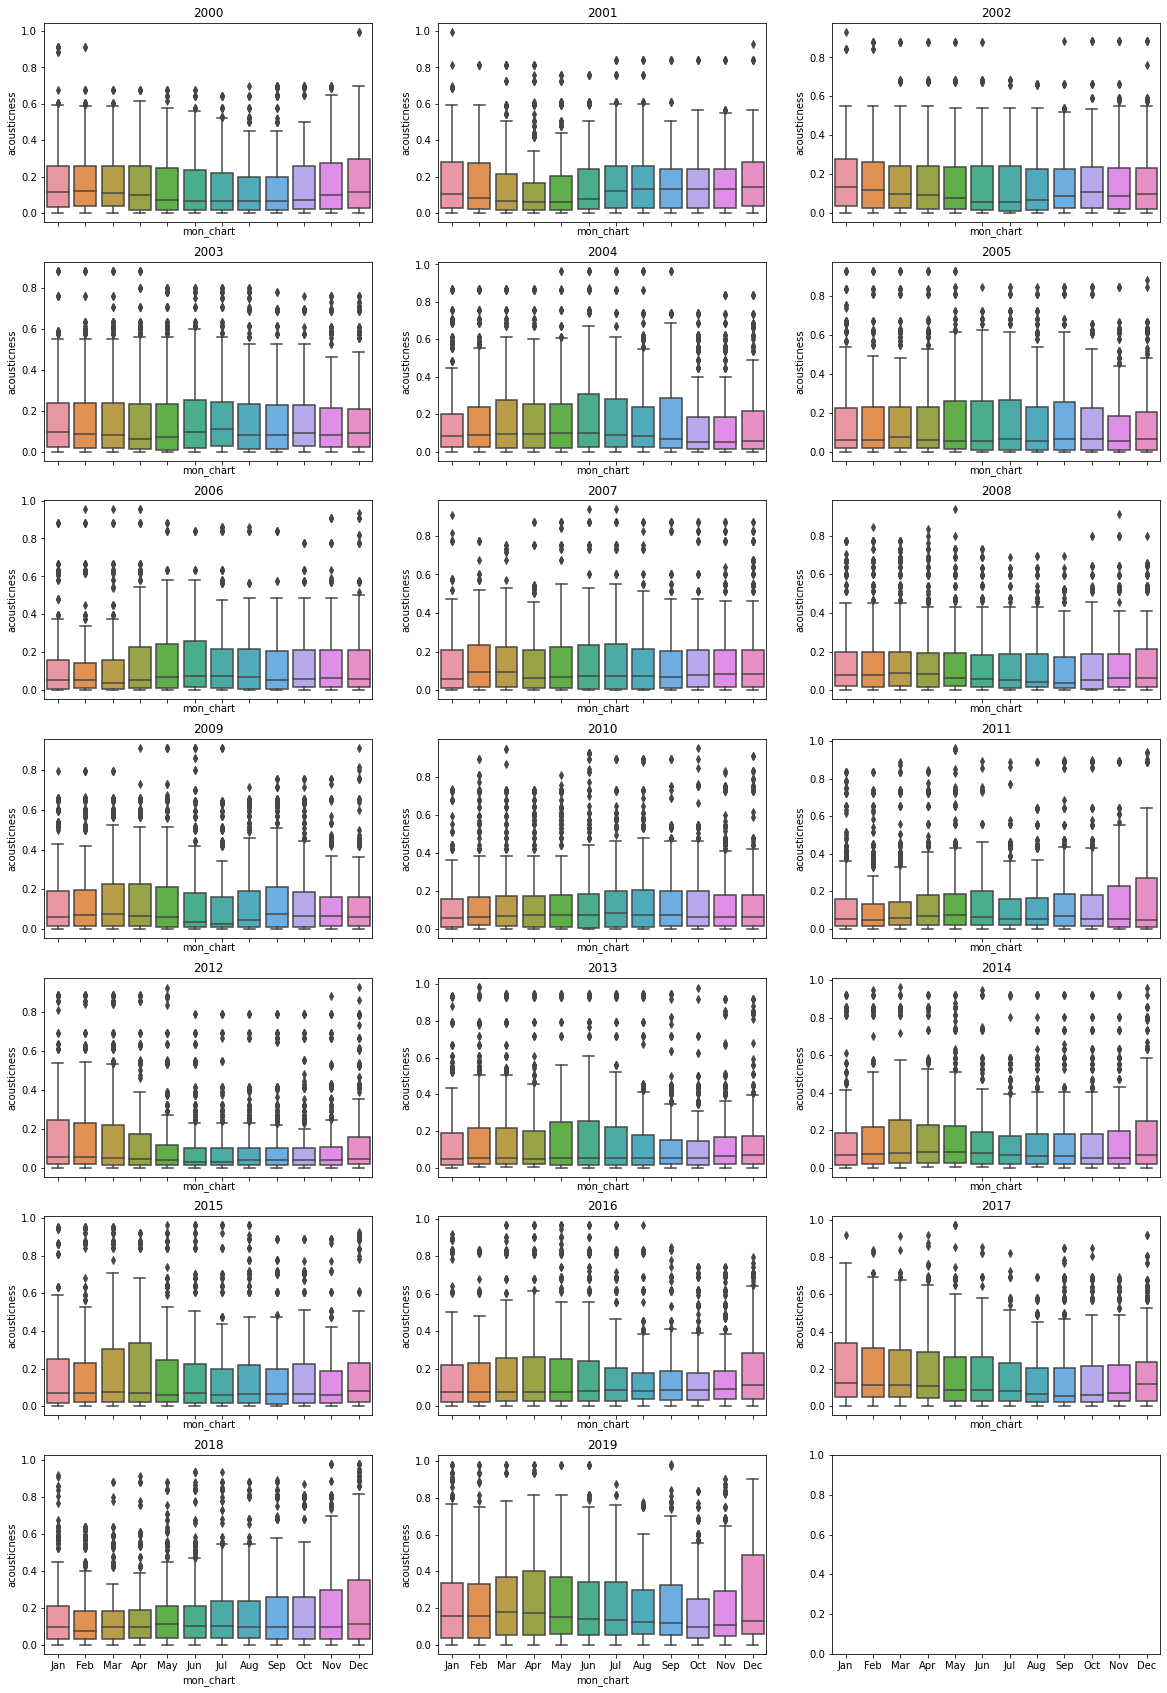

In [25]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Instrumentalidad (*instrumentalness*) 

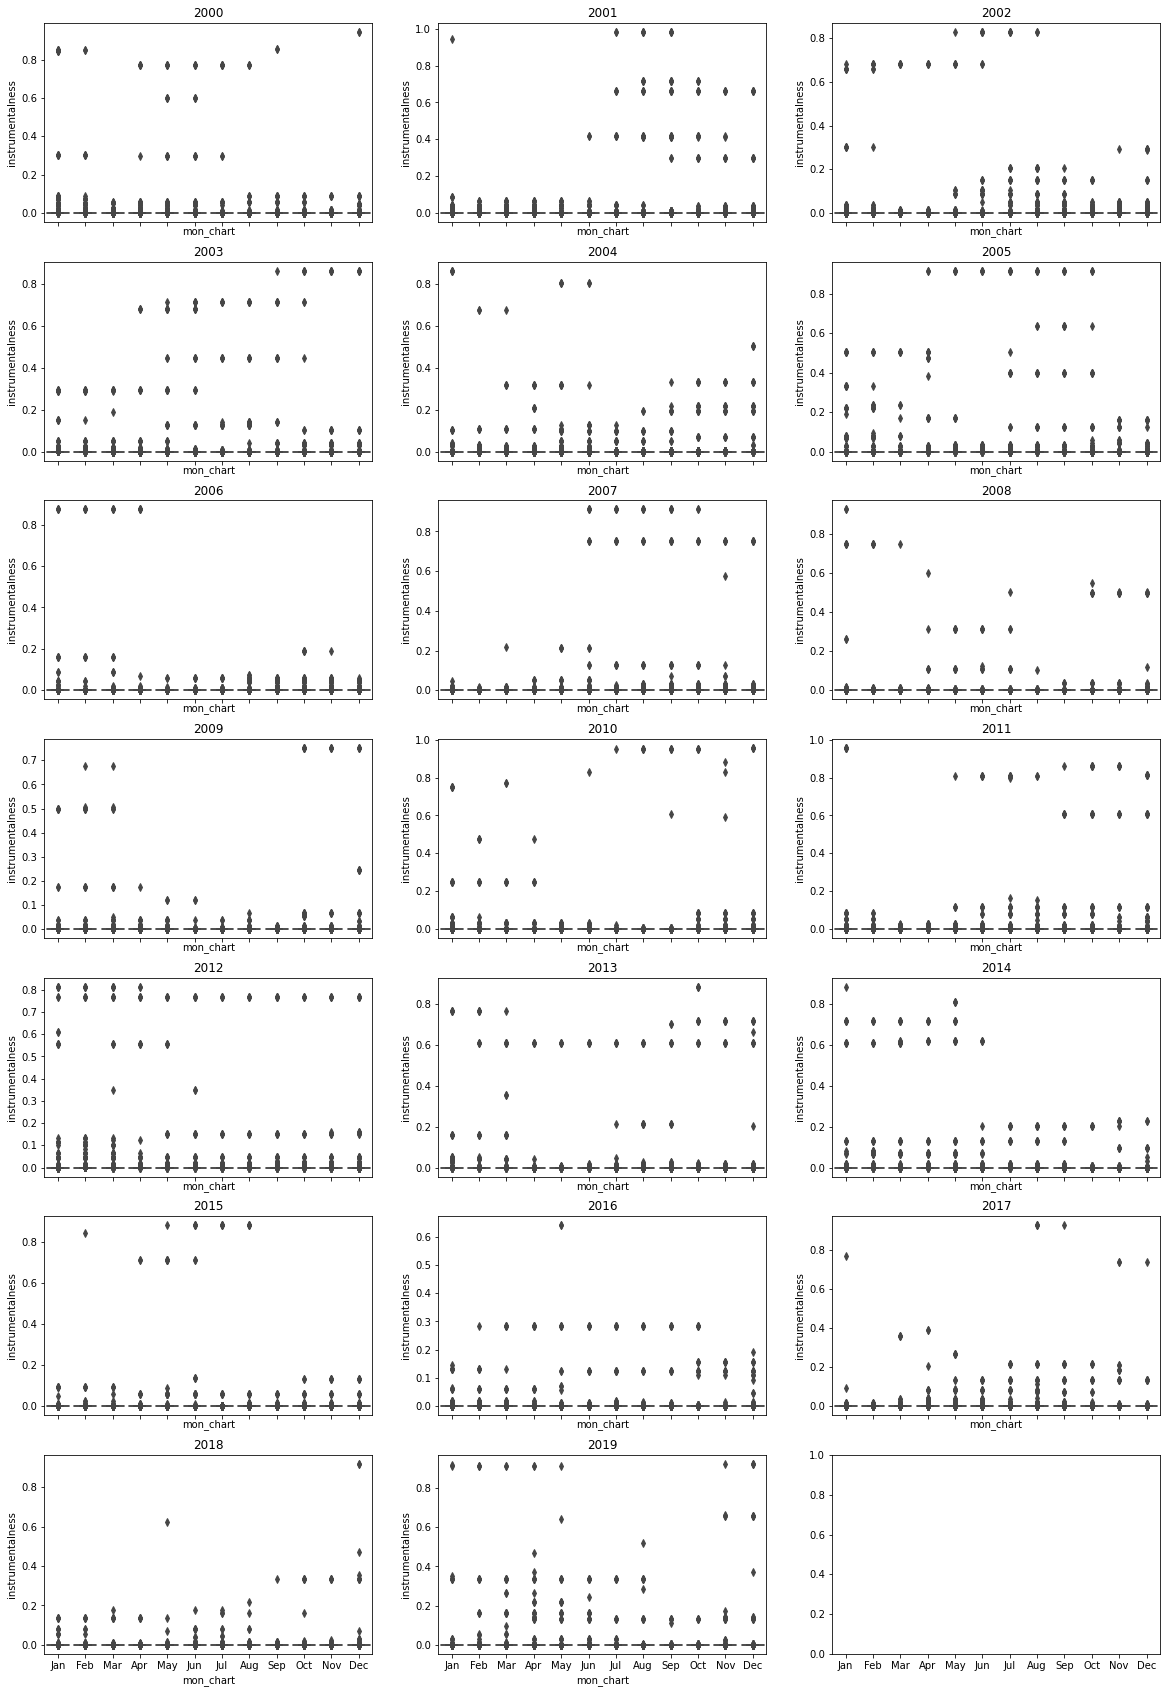

In [26]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Vivacidad (*liveness*) 

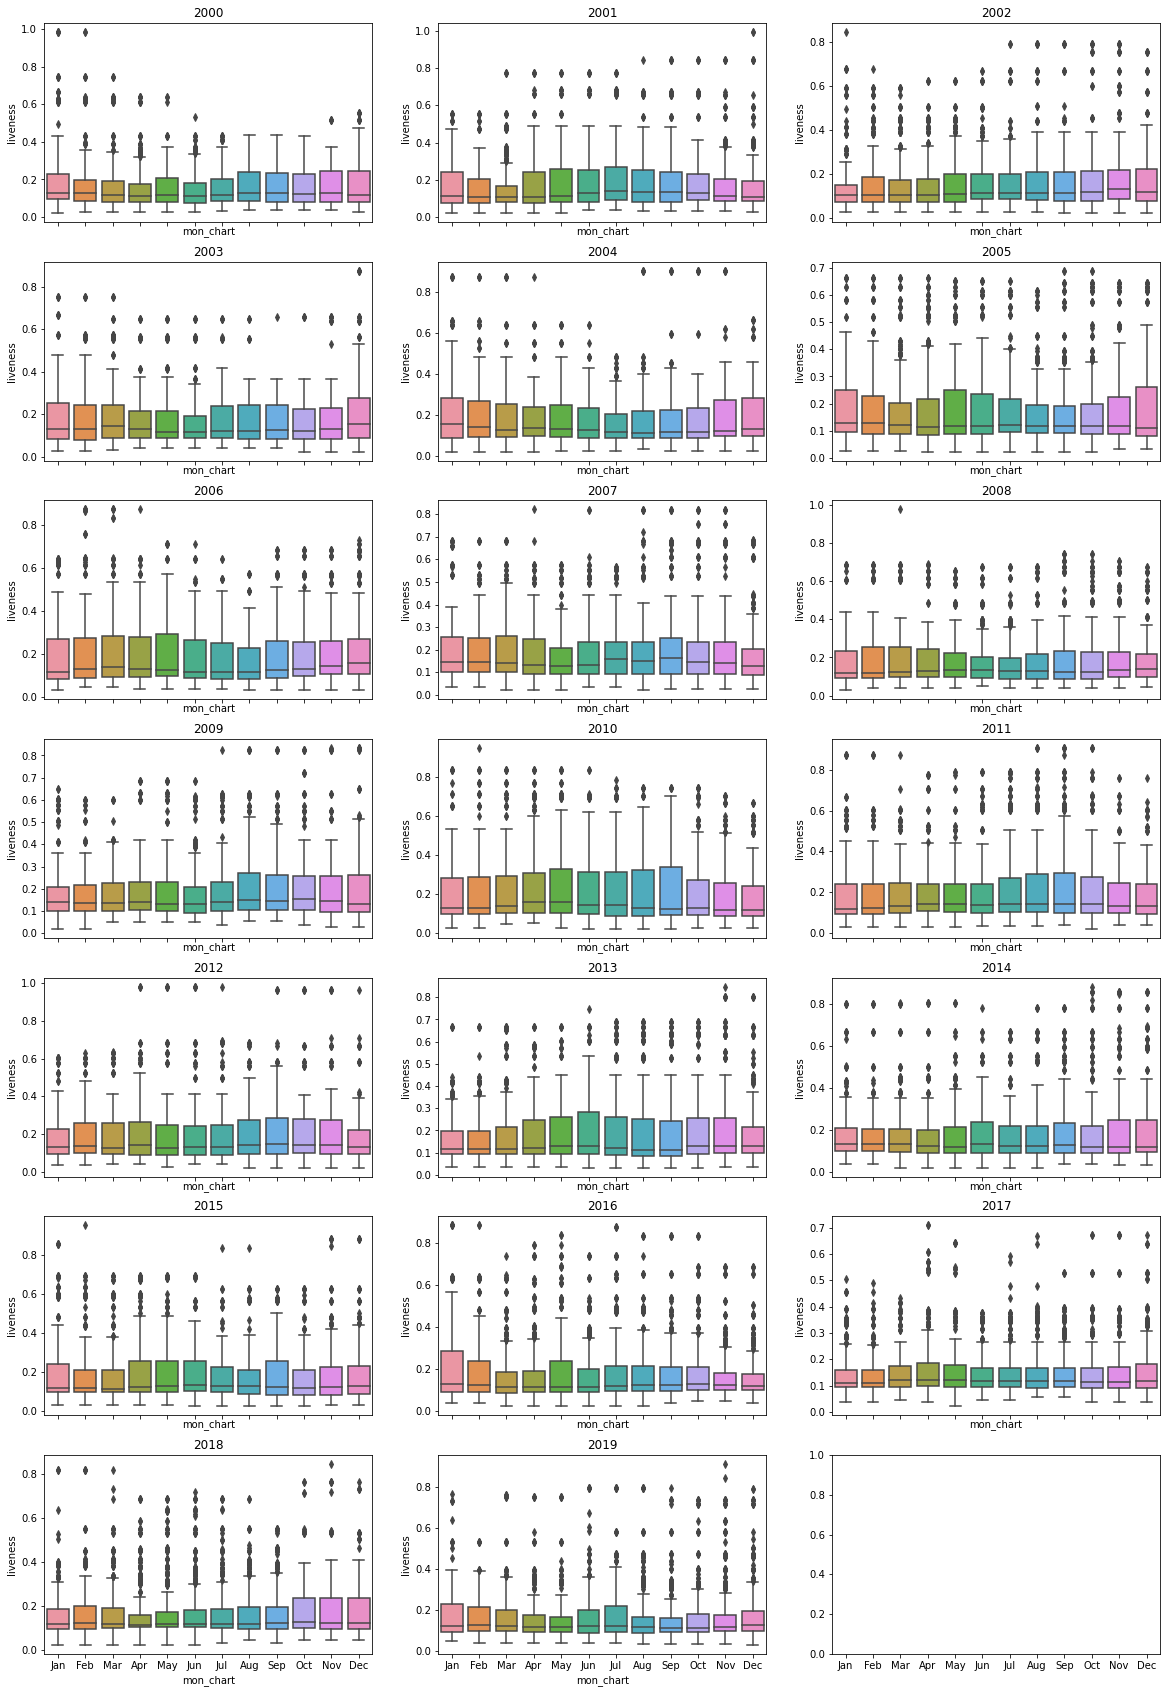

In [27]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Valencia (*valence*)

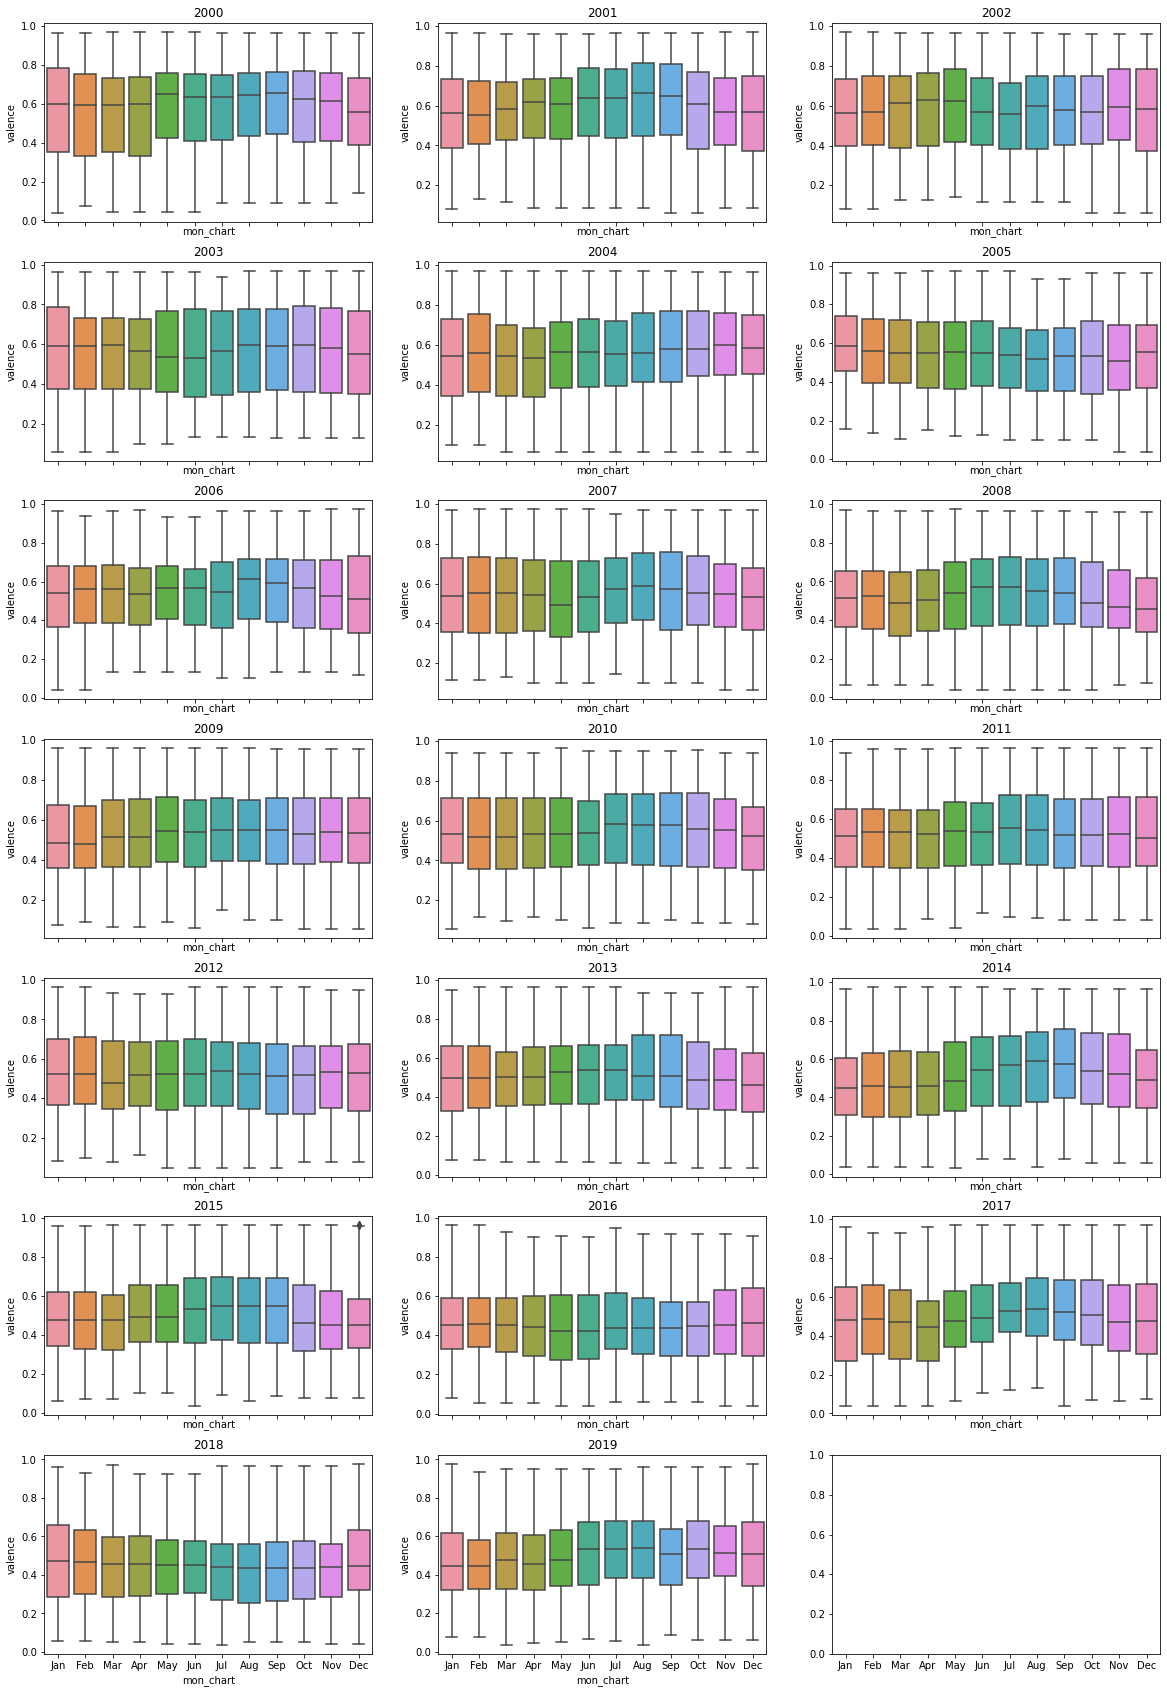

In [28]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

### Tempo (*tempo*)

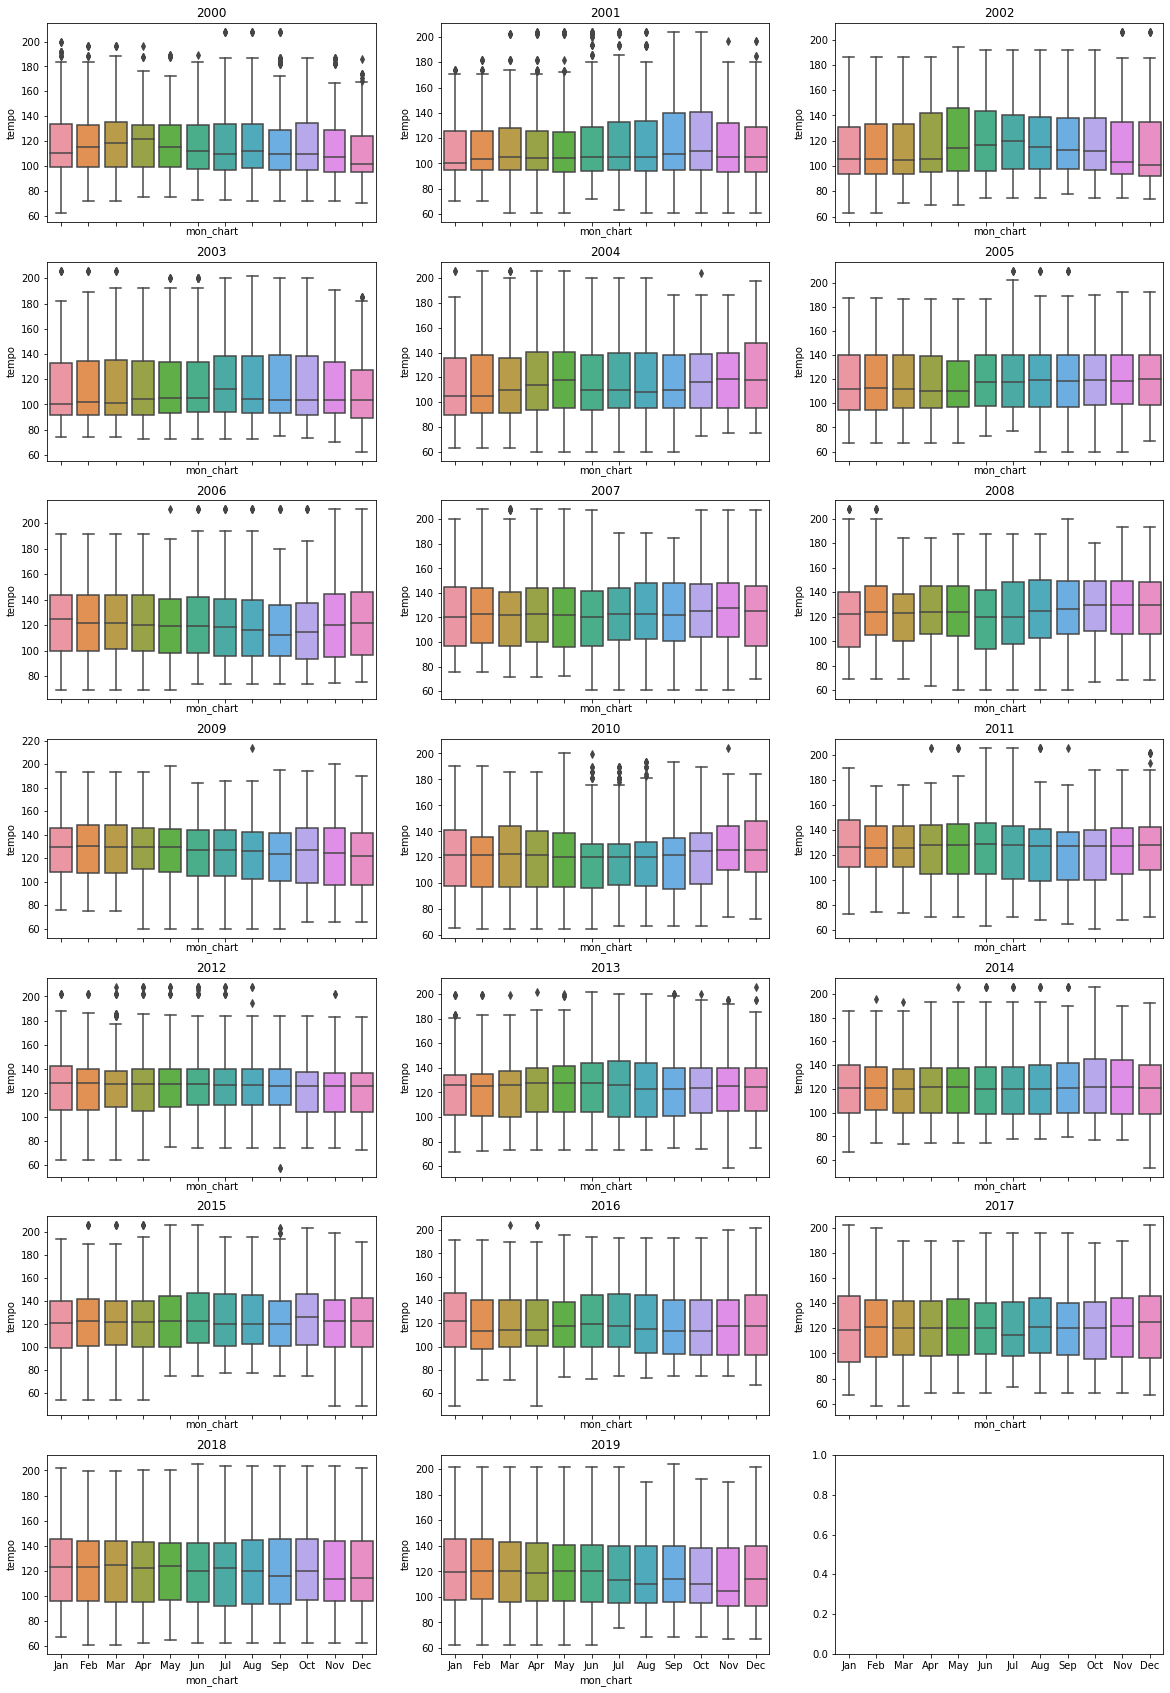

In [29]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

No hemos conseguido apreciar cambios reseñables en los meses, existen ligeras variaciones pero no existe ninguna clara variación común a los diferentes años que nos permita extraer conclusiones.

## Matriz de correlación
- Graficamos matriz de correlacion para ver si existe relación entre caracteristicas

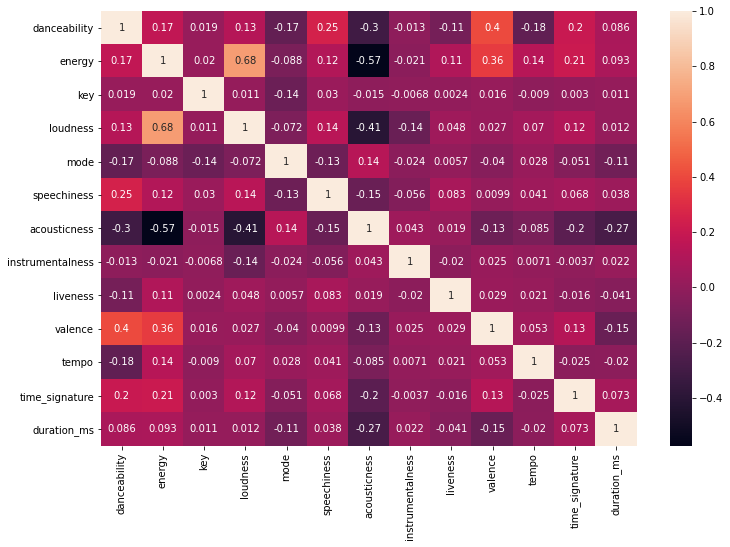

In [30]:
dims = (12, 8)
fig = plt.figure(figsize=dims)
sns.heatmap(df_hits.loc[:,"danceability":"duration_ms"].corr(), annot = True);

Observando la matriz podemos apreciar los siguientes detalles. Podemos observar una relación entre las características de *loudness* y *energy* lo que tiene bastante sentido que  haya una relación entre la energía de la canción y el volumen. También podemos observar un distanciamiento importante entre las características de *energy* y *loudness* con *acousticness* lo que también es bastante coherente, que una canción con más acústica musical tienda a ser menos enérgica y con un menor volumen. Por último podemos observar una relación entre *valence* y *danceability* lo cual nos indica que cuanto mayor sea el valencia (recordemos que cuanto más valencia, más alegre) la canción tendera a ser más bailable.

## Top 10 artistas con mas hits
 - A continuación se mostrarán lo 10 artistas con más hits a lo largo de la historia

In [8]:
print (df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"])

artist
Glee Cast          202
Drake              146
Taylor Swift       107
Eminem              71
Lil Wayne           67
Future              65
Kanye West          63
The Beatles         62
Aretha Franklin     62
Justin Bieber       62
Name: title, dtype: int64


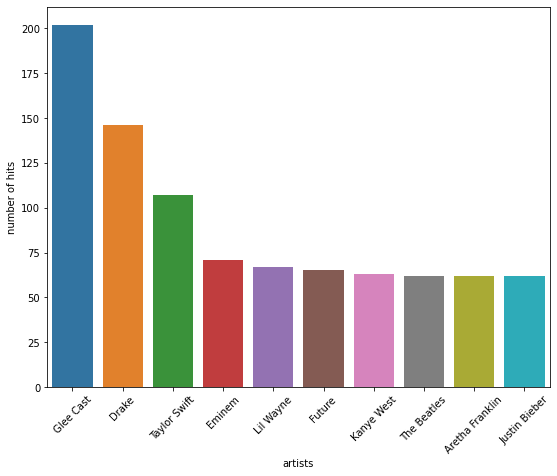

In [10]:
artists_bar_data = df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"]
chart = sns.barplot(artists_bar_data.index, artists_bar_data.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='artists', ylabel='number of hits');

In [57]:
df_artists_bar_data = artists_bar_data.to_frame()
df_artists_bar_data.reset_index(inplace=True)
df_artists_bar_data.to_csv('../Data/top_10_artists_hits.csv',index = False, header=True)

Como podemos observar en el siguiente gráfico, los artistas con más *hits* son grandes estrellas musicales reconocidas internacionalmente y con un importante prestigio. Es interesante ver el gran éxito de la serie de televisión de Glee en Estados Unidos, que ha creado grandes éxitos con sus versiones.

- Para cada uno de los artistas vamos a ver su evolución de sus *hits* en el tiempo

In [27]:
df_top_artists = df_hits_uniq.groupby(["artist","year_chart"])\
.count().sort_values('title',ascending=False).iloc[:]["title"].reset_index()
df_top_artists = df_top_artists.rename(columns={"title":"count"})
df_top_artists = df_top_artists.astype({"count": float})

In [82]:
df_Glee = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[0])]
df_Drake = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[1])]
df_Taylor = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[2])]
df_Eminem = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[3])]
df_Wayne = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[4])]
df_Future = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[5])]
df_Kanye = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[6])]
df_Beatles = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[7])]
df_Franklin = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[8])]
df_Bieber = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[9])]

In [83]:
min_year_glee = df_Glee.iloc[:]["year_chart"].min()
max_year_glee = df_Glee.iloc[:]["year_chart"].max()
df_Glee = df_Glee.copy()
for i in range(min_year_glee,max_year_glee):
    if df_Glee[df_Glee["year_chart"]==i].any().any() == False:
        df_Glee.loc[-1]= [df_Glee.iloc[0]["artist"],i,0]

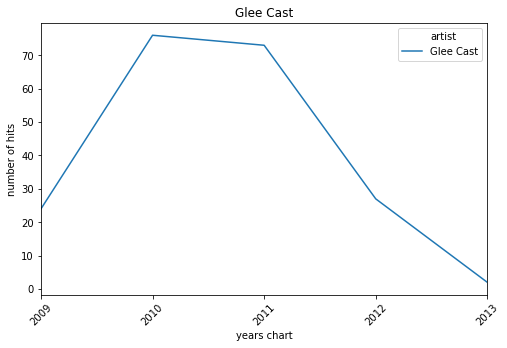

In [84]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_glee,max_year_glee)
ax.set_xticks(range(min_year_glee,max_year_glee+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Glee);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[0])
plt.setp(chart.get_xticklabels(),rotation=45);

In [85]:
min_year_drake = df_Drake.iloc[:]["year_chart"].min()
max_year_drake = df_Drake.iloc[:]["year_chart"].max()
df_Drake = df_Drake.copy()
for i in range(min_year_drake,max_year_drake):
    if df_Drake[df_Drake["year_chart"]==i].any().any() == False:
        df_Drake.loc[-1]= [df_Drake.iloc[0]["artist"],i,0]

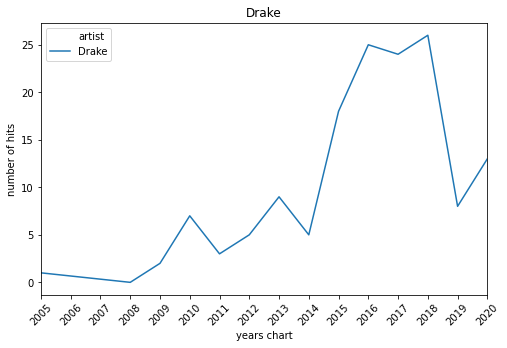

In [86]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_drake,max_year_drake)
ax.set_xticks(range(min_year_drake,max_year_drake+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Drake);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[1])
plt.setp(chart.get_xticklabels(),rotation=45);

In [87]:
min_year_taylor = df_Taylor.iloc[:]["year_chart"].min()
max_year_taylor = df_Taylor.iloc[:]["year_chart"].max()
df_Taylor = df_Taylor.copy()
for i in range(min_year_taylor,max_year_taylor):
    if df_Taylor[df_Taylor["year_chart"]==i].any().any() == False:
        df_Taylor.loc[-1]= [df_Taylor.iloc[0]["artist"],i,0]

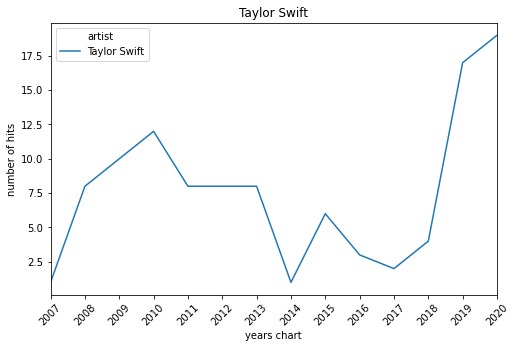

In [88]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_taylor,max_year_taylor)
ax.set_xticks(range(min_year_taylor,max_year_taylor+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Taylor);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[2])
plt.setp(chart.get_xticklabels(),rotation=45);

In [89]:
min_year_eminem = df_Eminem.iloc[:]["year_chart"].min()
max_year_eminem = df_Eminem.iloc[:]["year_chart"].max()
df_Eminem = df_Eminem.copy()
for i in range(min_year_eminem,max_year_eminem):
    if df_Eminem[df_Eminem["year_chart"]==i].any().any() == False:
        df_Eminem.loc[-1]= [df_Eminem.iloc[0]["artist"],i,0]

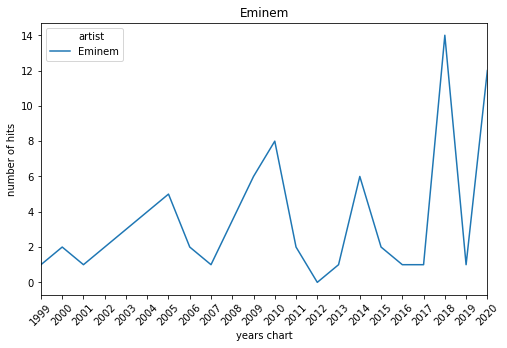

In [90]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_eminem,max_year_eminem)
ax.set_xticks(range(min_year_eminem,max_year_eminem+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Eminem);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[3])
plt.setp(chart.get_xticklabels(),rotation=45);

In [91]:
min_year_wayne = df_Wayne.iloc[:]["year_chart"].min()
max_year_wayne = df_Wayne.iloc[:]["year_chart"].max()
df_Wayne = df_Wayne.copy()
for i in range(min_year_wayne,max_year_wayne):
    if df_Wayne[df_Wayne["year_chart"]==i].any().any() == False:
        df_Wayne.loc[-1]= [df_Wayne.iloc[0]["artist"],i,0]

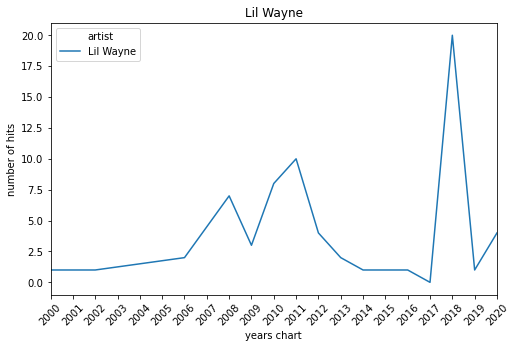

In [92]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_wayne,max_year_wayne)
ax.set_xticks(range(min_year_wayne,max_year_wayne+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Wayne);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[4])
plt.setp(chart.get_xticklabels(),rotation=45);

In [93]:
min_year_future = df_Future.iloc[:]["year_chart"].min()
max_year_future  = df_Future.iloc[:]["year_chart"].max()
df_Future = df_Future.copy()
for i in range(min_year_future,max_year_future):
    if df_Future[df_Future["year_chart"]==i].any().any() == False:
        df_Future.loc[-1]= [df_Future.iloc[0]["artist"],i,0]

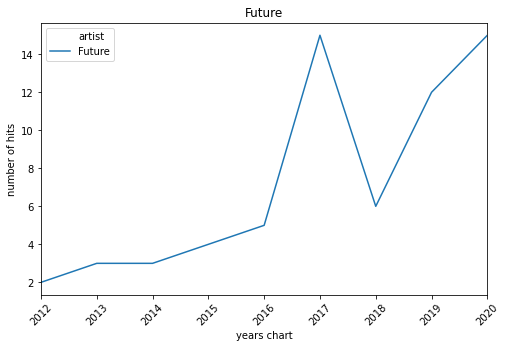

In [94]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_future,max_year_future)
ax.set_xticks(range(min_year_future,max_year_future+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Future);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[5])
plt.setp(chart.get_xticklabels(),rotation=45);

In [95]:
min_year_kanye = df_Kanye.iloc[:]["year_chart"].min()
max_year_kanye  = df_Kanye.iloc[:]["year_chart"].max()
df_Kanye = df_Kanye.copy()
for i in range(min_year_kanye,max_year_kanye):
    if df_Kanye[df_Kanye["year_chart"]==i].any().any() == False:
        df_Kanye.loc[-1]= [df_Kanye.iloc[0]["artist"],i,0]

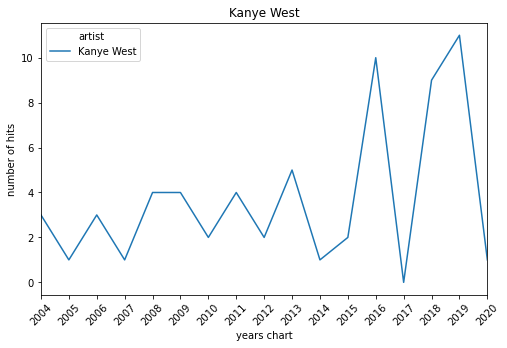

In [96]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_kanye,max_year_kanye)
ax.set_xticks(range(min_year_kanye,max_year_kanye+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Kanye);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[6])
plt.setp(chart.get_xticklabels(),rotation=45);

In [97]:
min_year_beatles = df_Beatles.iloc[:]["year_chart"].min()
max_year_beatles  = df_Beatles.iloc[:]["year_chart"].max()
df_Beatles = df_Beatles.copy()
for i in range(min_year_beatles,max_year_beatles):
    if df_Beatles[df_Beatles["year_chart"]==i].any().any() == False:
        df_Beatles.loc[-1]= [df_Beatles.iloc[0]["artist"],i,0]

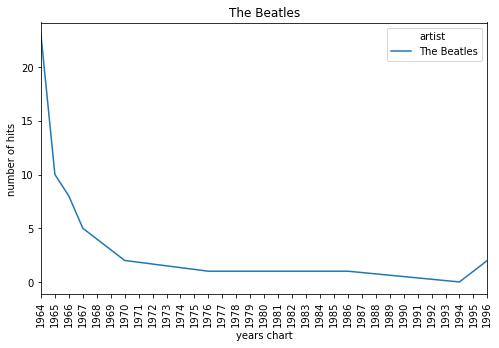

In [98]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_beatles,max_year_beatles)
ax.set_xticks(range(min_year_beatles,max_year_beatles+1))
chart  = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Beatles);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[7])
plt.setp(chart.get_xticklabels(),rotation=90);

In [99]:
min_year_franklin = df_Franklin.iloc[:]["year_chart"].min()
max_year_franklin  = df_Franklin.iloc[:]["year_chart"].max()
df_Franklin = df_Franklin.copy()
for i in range(min_year_franklin,max_year_franklin):
    if df_Franklin[df_Franklin["year_chart"]==i].any().any() == False:
        df_Franklin.loc[-1]= [df_Franklin.iloc[0]["artist"],i,0]

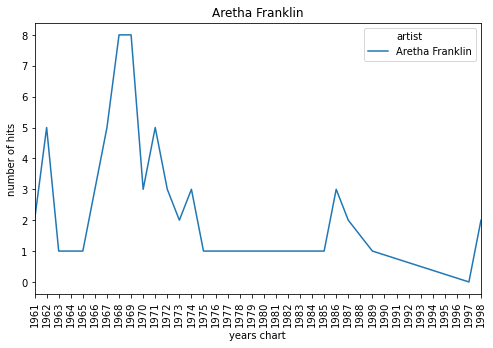

In [100]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_franklin,max_year_franklin)
ax.set_xticks(range(min_year_franklin,max_year_franklin+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Franklin);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[8])
plt.setp(chart.get_xticklabels(),rotation=90);

In [101]:
min_year_bieber = df_Bieber.iloc[:]["year_chart"].min()
max_year_bieber  = df_Bieber.iloc[:]["year_chart"].max()
df_Bieber = df_Bieber.copy()
for i in range(min_year_bieber,max_year_bieber):
    if df_Bieber[df_Bieber["year_chart"]==i].any().any() == False:
        df_Bieber.loc[-1]= [df_Bieber.iloc[0]["artist"],i,0]

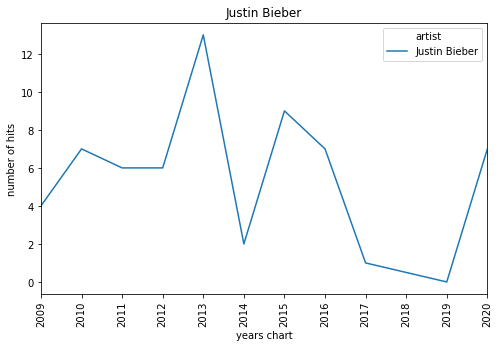

In [102]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_bieber,max_year_bieber)
ax.set_xticks(range(min_year_bieber,max_year_bieber+1))
chart  = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Bieber);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[9])
plt.setp(chart.get_xticklabels(),rotation=90);

## Canciones con mas semanas en Hot-100
 - A continuación se mostrarán aquellos *hits* que más semanas se han mantenido en *hot-100*

In [28]:
top_weeks_charts = df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10][["artist","title","weeks","release_date","genres"]]
print (df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10][["artist","title","weeks","release_date"]])

                  artist                title  weeks release_date
268122   Imagine Dragons          Radioactive     87   2012-09-04
267426        AWOLNATION                 Sail     79         2011
244363        Jason Mraz            I'm Yours     76   2008-05-12
188602       LeAnn Rimes        How Do I Live     69   2003-11-18
258774             LMFAO    Party Rock Anthem     68   2011-01-01
270388       OneRepublic       Counting Stars     68   2014-01-01
257376             Adele  Rolling in the Deep     65   2011-01-19
234913  Carrie Underwood     Before He Cheats     64   2005-11-14
264451     The Lumineers               Ho Hey     62   2012-04-03
226698         Lifehouse           You And Me     62   2005-03-22


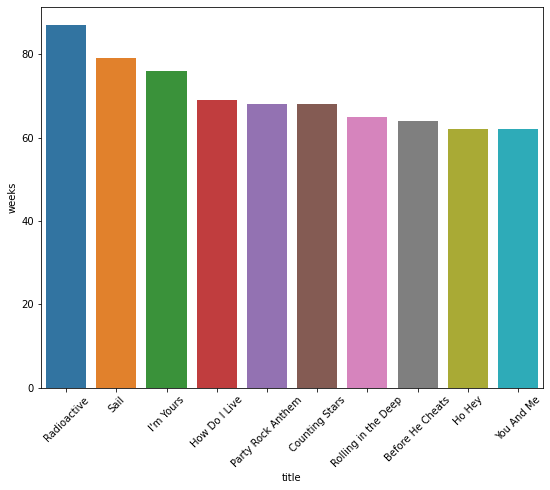

In [29]:
chart = sns.barplot(x="title",y="weeks",data = df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [58]:
top_weeks_charts.to_csv('../Data/top_10_weeks_hits.csv',index = False, header=True)

In [41]:
for index, item in top_weeks_charts.iterrows():
    print ("Artist: ",item['artist'],"--> genres:" ,item['genres'])

Artist:  Imagine Dragons --> genres: ['modern rock', 'pop', 'rock']
Artist:  AWOLNATION --> genres: ['la indie', 'modern alternative rock', 'modern rock', 'pop rock', 'rock', 'stomp pop']
Artist:  Jason Mraz --> genres: ['acoustic pop', 'neo mellow', 'pop', 'pop rock']
Artist:  LeAnn Rimes --> genres: ['country', 'country dawn', 'dance pop', 'pop rock']
Artist:  LMFAO --> genres: ['dance pop', 'edm', 'pop', 'pop rap']
Artist:  OneRepublic --> genres: ['dance pop', 'piano rock', 'pop', 'pop rock']
Artist:  Adele --> genres: ['british soul', 'pop', 'uk pop']
Artist:  Carrie Underwood --> genres: ['contemporary country', 'country', 'country dawn', 'country road', 'dance pop', 'oklahoma country', 'pop']
Artist:  The Lumineers --> genres: ['folk-pop', 'modern rock', 'stomp and holler']
Artist:  Lifehouse --> genres: ['alternative metal', 'neo mellow', 'pop rock', 'post-grunge']


Haciendo una pequeña búsqueda en *youtube*, estamos ante canciones con gran cantidad de visualizaciones. La canción de *Radioactive* llega a superar los 1000 millones de visualizaciones y la última en nuestra lista del grupo *Lifehouse* los 154 millones de visualizaciones. Como podemos observar estamos ante canciones diferentes en género aunque manteniendo la esencia del *pop*.

## Canciones con más tiempo en número 1
- A continuación se muestran las canciones que más semanas han estado en la posición 1.

In [42]:
df_hits_1 = df_hits.drop(df_hits[df_hits["rank"]>1].index)

In [162]:
df_hits_1_weeks = df_hits_1.groupby(["id","artist","title"]).count().sort_values("weeks",ascending = False).iloc[:15][["weeks"]]
print (df_hits_1_weeks)

                                                                                           weeks
id                     artist          title                                                    
2YpeDb67231RjR0MgVLzsG Lil Nas X       Old Town Road - Remix                                  19
6rPO02ozF3bM7NnOV4h6s2 Luis Fonsi      Despacito - Remix                                      16
7ySbfLwdCwl1EM0zNCJZ38 Mariah Carey    One Sweet Day                                          16
32OlwWuMpZ6b0aN2RZOeMS Mark Ronson     Uptown Funk (feat. Bruno Mars)                         14
61sQYdFNS6sEBYCyr1q5gn Boyz II Men     I'll Make Love To You                                  14
3LmvfNUQtglbTrydsdIqFU Mariah Carey    We Belong Together                                     14
4eHbdreAnSOrDDsFfc4Fpm Whitney Houston I Will Always Love You                                 14
5LjSxAIKwyZvQqJ04ZQ0Da Elton John      Something About The Way You Look Tonight - Edit...     14
2df5QsXucx4VLiHNGusXD5 Los Del

In [163]:
df_hits_1_weeks.reset_index(inplace=True)  

In [164]:
del df_hits_1_weeks['id']

In [172]:
dfi.export(df_hits_1_weeks, '../Figures/More_Weeks_1.png')

Como podemos observar, Despacito hasta hace bien poco fue la que tenía el récord, superada hace recientemente poco por *Lil Nas X*, también es interesante observar la aparición de la Macarena con 14 semanas como número 1 en una lista de éxitos estadounidenses.

## Canciones que comenzaron siendo número 1
- A continuación se muestran aquellas canciones que comenzaron siendo número 1.

In [182]:
df_Hits_start_1 = df_hits[(df_hits["isNew"]==True) &
       (df_hits["rank"]==1)].sort_values(["rank","year_chart"],ascending=True).head(100)[["artist","title","rank"]]
df_Hits_start_1

,artist,title,rank
0,Ricky Nelson,Poor Little Fool - Remastered,1
173282,Michael Jackson,You Are Not Alone,1
173676,Mariah Carey,Fantasy,1
174462,Whitney Houston,Exhale (Shoop Shoop) - from Waiting to Exhale ...,1
174560,Mariah Carey,One Sweet Day,1
182283,Diddy,I'll Be Missing You (feat. 112),1
183463,Mariah Carey,Honey,1
183824,Elton John,Something About The Way You Look Tonight - Edi...,1
185663,Céline Dion,"My Heart Will Go On - Love Theme from ""Titanic""",1
188102,Aerosmith,"I Don't Want to Miss a Thing - From ""Armageddo...",1


In [186]:
dfi.export(df_Hits_start_1, '../Figures/Hits_Start_1.png')

In [178]:
len(df_Hits_start_1)

43

Podemos observar un total de 43 *hits* que comenzaron siendo número 1, como podemos observar la gran mayoría de artistas que han comenzado en la lista como número 1 por lo general son artistas bastante conocidos tanto nacional como internacionalmente.

## Sellos discográficos con más *hits*
- A continuación se muestran los sellos discográficos con más *hits*

In [33]:
print (df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"])

label
Columbia                926
Capitol Records         803
Rhino Atlantic          761
Geffen                  680
Rhino                   525
Rhino/Warner Records    516
Columbia/Legacy         479
UNI/MOTOWN              472
Legacy Recordings       445
RCA Records Label       442
Name: id, dtype: int64


In [34]:
labels = df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:]["id"]

In [35]:
labels_dict = labels.to_dict()

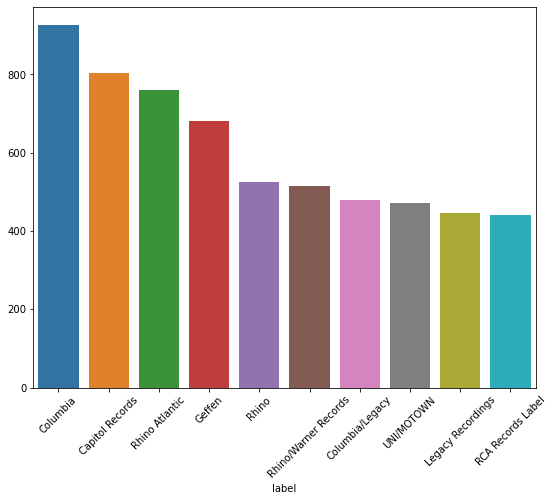

In [36]:
labels_bar_data = df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"]
chart = sns.barplot(labels_bar_data.index, labels_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

- A continuación, se hará una representación de estas 10 discográficas con su evolución de hits a lo largo del tiempo.

In [62]:
df_label_years = df_hits_uniq.groupby(["label","year_chart"])\
.count().sort_values('id',ascending=False).iloc[:]["id"].reset_index()

In [63]:
df_label_10 = df_label_years [(df_label_years["label"] == labels_bar_data.index[0]) |
                                (df_label_years["label"] == labels_bar_data.index[1]) |
                                (df_label_years["label"] == labels_bar_data.index[2]) |
                                (df_label_years["label"] == labels_bar_data.index[3]) |
                                (df_label_years["label"] == labels_bar_data.index[4]) |
                                (df_label_years["label"] == labels_bar_data.index[5]) |
                                (df_label_years["label"] == labels_bar_data.index[6]) |
                                (df_label_years["label"] == labels_bar_data.index[7]) |
                                (df_label_years["label"] == labels_bar_data.index[8]) |
                                (df_label_years["label"] == labels_bar_data.index[9])]
df_label_10 = df_label_10.rename(columns={"id":"count"})
df_label_10 = df_label_10.astype({"count": float})

In [66]:
df_label_10.to_csv('../Data/labels_hits.csv',index = False, header=True)

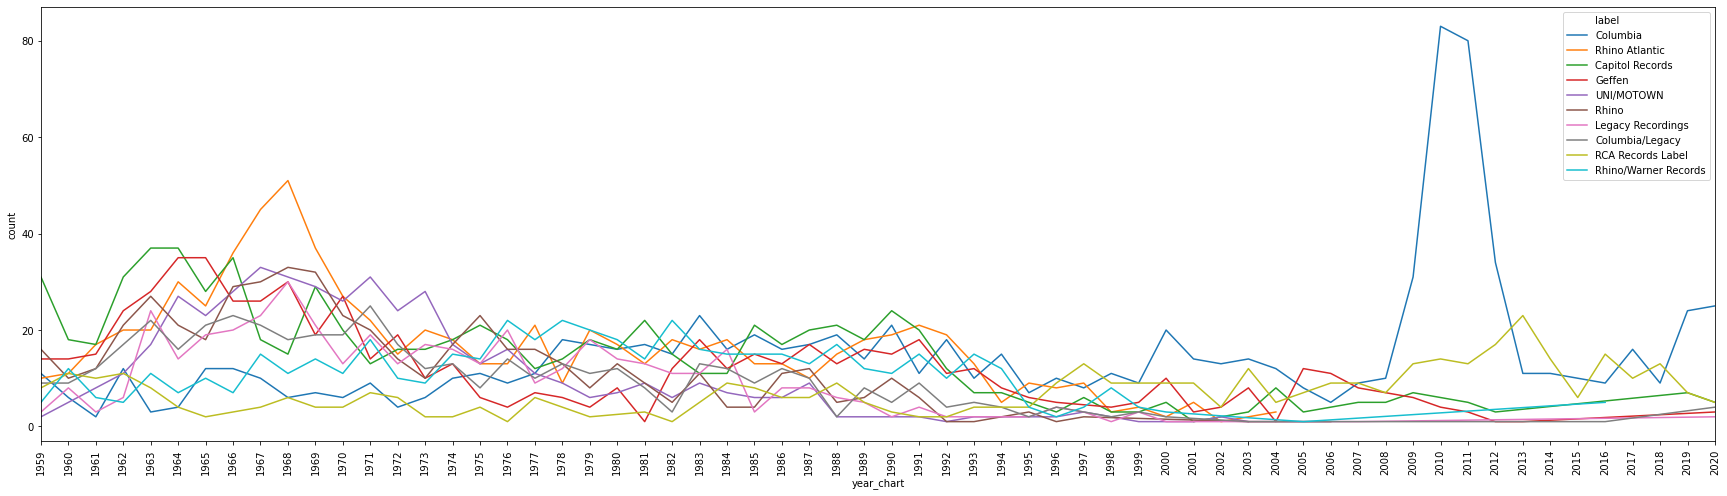

In [196]:
a_dims = (30, 8)
fig, ax = plt.subplots(figsize=a_dims)
ax.set_xlim(1959,2020)
ax.set_xticks(range(1959,2021))
chart  = sns.lineplot(x="year_chart", y="count",hue="label", data=df_label_10);
plt.setp(chart.get_xticklabels(),rotation=90);

In [67]:
df_labels_bar_data = pd.DataFrame(labels_bar_data)
df_labels_bar_data.reset_index(inplace=True)
df_labels_bar_data.to_csv('../Data/labels_bar_hits.csv',index = False, header=True)

In [215]:
select_type = alt.selection(type="single",encodings=["x"])

line_labels = alt.Chart(df_label_10).mark_line().encode(
    x='year_chart:T',
    y='count',
    color='label'
).properties(
    width=650,
    height=300,
).interactive().transform_filter(select_type)

bar_labels = alt.Chart(df_labels_bar_data).mark_bar().encode(
    x="label",
    y="id",
    color="label"
).add_selection(select_type)

chart_labels = (bar_labels|line_labels)
chart_labels

alt.HConcatChart(...)

In [198]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2009) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast            24
Bow Wow               1
Mary Mary             1
Bruce Springsteen     1
The Ting Tings        1
Maxwell               1
John Mayer            1
Boys Like Girls       1
Name: artist, dtype: int64

In [199]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2010) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast          76
Train               2
Maxwell             2
John Mayer          2
Boys Like Girls     1
Name: artist, dtype: int64

In [70]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2011) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast           73
Train                3
Kreayshawn           1
Miranda Cosgrove     1
Steven Tyler         1
Mary Mary            1
Name: artist, dtype: int64

In [71]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2018) &
                 (df_hits_uniq["label"]=="Republic Records")]["artist"].value_counts()

Post Malone               17
Ariana Grande              8
Metro Boomin               6
NAV                        2
Drake                      1
Ski Mask The Slump God     1
Name: artist, dtype: int64

In [72]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2019) &
                 (df_hits_uniq["label"]=="Republic Records")]["artist"].value_counts()

Ariana Grande             15
Post Malone               14
Lil Tecca                  4
Drake                      2
Ski Mask The Slump God     2
Jacquees                   1
Metro Boomin               1
Name: artist, dtype: int64

## Géneros musicales más comunes en hits
- A continuación se verán los géneros musicales más populares en los *hits*

Lo primero que vamos a hacer, ya que spotify diferencia entre más de 4000 géneros musicales, es agrupar aquellos géneros que según mi criterio se pueden agrupar en un género superior que los englobe, de esta manera será más fácil la interpretación.

Lo que se hace en el siguiente código, es ir buscando cadenas de caracteres que correspondan con algunos de los subgéneros, por ejemplo todos los géneros que contengan la palabra *pop* se han agrupado en un genérico de *pop*. Puede suceder que en la lista de géneros, al realizar esta acción se generen varias veces el mismo género, por lo que se hace una limpieza para solo quedarnos con uno si es que esto sucede, y posteriormente descartamos todos estos subgéneros y nos quedamos con el principal mas los que no hayamos podido clasificar y así para cada lista, que finalmente almacenaremos en una gran lista final.

In [11]:
all_genres = []
genres_aux = []
for genre in df_hits_uniq["genres"]:
    genres_aux.clear()
    list_genre = ast.literal_eval(genre) 
    subs_pop = "pop"
    res = [i for i in list_genre if subs_pop in i] 
    if len(res)>0:
        genres_aux.append("pop")
    subs_rock = "rock"
    res = [i for i in list_genre if subs_rock in i] 
    if len(res)>0:
        genres_aux.append("rock")
    subs_mellow = "mellow gold"
    res = [i for i in list_genre if subs_mellow in i] 
    if len(res)>0:
        genres_aux.append("rock")
    subs_rap = "rap"
    res = [i for i in list_genre if subs_rap in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary")
    subs_hip_hop = "hip hop"
    res = [i for i in list_genre if subs_hip_hop in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary")
    subs_urban = "urban contemporary"
    res = [i for i in list_genre if subs_urban in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary")
    subs_dance = "dance"
    res = [i for i in list_genre if subs_dance in i] 
    if len(res)>0:
        genres_aux.append("dance")
    subs_disco = "disco"
    res = [i for i in list_genre if subs_disco in i] 
    if len(res)>0:
        genres_aux.append("dance")
    subs_house = "house"
    res = [i for i in list_genre if subs_house in i] 
    if len(res)>0:
        genres_aux.append("dance")
    subs_classical = "classical"
    res = [i for i in list_genre if subs_classical in i] 
    if len(res)>0:
        genres_aux.append("classical")   
    subs_soul = "soul"
    res = [i for i in list_genre if subs_soul in i] 
    if len(res)>0:
        genres_aux.append("soul")   
    subs_rb = "r&b"
    res = [i for i in list_genre if subs_rb in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary") 
    subs_country = "country"
    res = [i for i in list_genre if subs_country in i] 
    if len(res)>0:
        genres_aux.append("country") 
    subs_metal = "metal"
    res = [i for i in list_genre if subs_metal in i] 
    if len(res)>0:
        genres_aux.append("metal") 
    subs_folk = "folk"
    res = [i for i in list_genre if subs_folk in i] 
    if len(res)>0:
        genres_aux.append("folk") 
    subs_blues = "blues"
    res = [i for i in list_genre if subs_blues in i] 
    if len(res)>0:
        genres_aux.append("blues") 
    subs_jazz = "jazz"
    res = [i for i in list_genre if subs_jazz in i] 
    if len(res)>0:
        genres_aux.append("jazz") 
    subs_indie = "indie"
    res = [i for i in list_genre if subs_indie in i] 
    if len(res)>0:
        genres_aux.append("indie") 
    subs_funk = "funk"
    res = [i for i in list_genre if subs_funk in i] 
    if len(res)>0:
        genres_aux.append("funk")
    subs_reggae = "reggae"
    res = [i for i in list_genre if subs_reggae in i] 
    if len(res)>0:
        genres_aux.append("reggae") 
    subs_motown = "motown"
    res = [i for i in list_genre if subs_motown in i] 
    if len(res)>0:
        genres_aux.append("soul") 
    subs_songwriter = "singer-songwriter"
    res = [i for i in list_genre if subs_songwriter in i] 
    if len(res)>0:
        genres_aux.append("singer-songwriter") 
    subs_swing = "swing"
    res = [i for i in list_genre if subs_swing in i] 
    if len(res)>0:
        genres_aux.append("swing") 
        

    all_genres += list(dict.fromkeys(genres_aux))
    
    res = [i for i in list_genre if not subs_pop in i] 
    res = [i for i in res if not subs_rock in i] 
    res = [i for i in res if not subs_rap in i] 
    res = [i for i in res if not subs_hip_hop in i] 
    res = [i for i in res if not subs_dance in i] 
    res = [i for i in res if not subs_disco in i] 
    res = [i for i in res if not subs_house in i] 
    res = [i for i in res if not subs_classical in i] 
    res = [i for i in res if not subs_soul in i] 
    res = [i for i in res if not subs_rb in i] 
    res = [i for i in res if not subs_country in i] 
    res = [i for i in res if not subs_metal in i] 
    res = [i for i in res if not subs_folk in i] 
    res = [i for i in res if not subs_blues in i] 
    res = [i for i in res if not subs_jazz in i] 
    res = [i for i in res if not subs_indie in i] 
    res = [i for i in res if not subs_funk in i] 
    res = [i for i in res if not subs_reggae in i] 
    res = [i for i in res if not subs_mellow in i] 
    res = [i for i in res if not subs_urban in i] 
    res = [i for i in res if not subs_motown in i] 
    res = [i for i in res if not subs_songwriter in i] 
    res = [i for i in res if not subs_swing in i] 
    
    all_genres += res
count_genres_years = Counter(all_genres)
count_genres_10 = count_genres_years.most_common()[:10]

In [12]:
df_count_genres_10 = pd.DataFrame(count_genres_10, columns =['genre', 'count'])
print (df_count_genres_10)

                genre  count
0                 pop  11882
1                rock   9935
2               dance   5524
3  urban contemporary   5230
4                soul   4141
5             country   3420
6     adult standards   2971
7                folk   2966
8                funk   2162
9         quiet storm   2101


In [22]:
df_count_genres_10.to_csv('../Data/top_10_genres_count.csv',index = False, header=True)

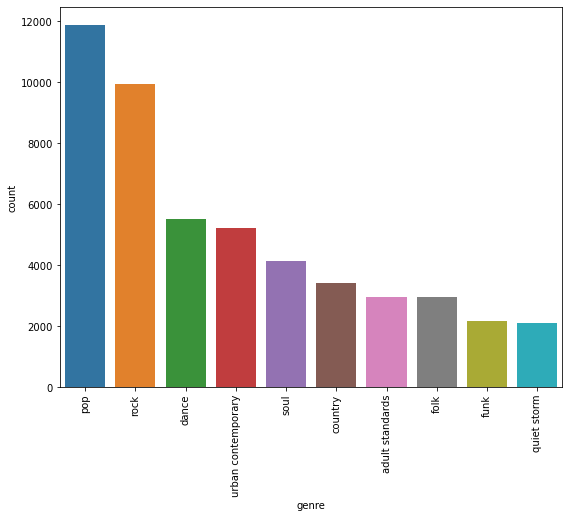

In [13]:
chart = sns.barplot (x="genre", y= "count",data= df_count_genres_10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Así podemos observar los 10 géneros más habituales en los *hits*

### Evolución de géneros en el tiempo
- A continuación se representará la evolución de *hits* para los 10 géneros más comunes.

In [14]:
def genres_year (year):
    all_genres = []
    genres_aux = []
    for genre in df_hits_uniq.loc[df_hits_uniq["year_chart"]==year]["genres"]:
        genres_aux.clear()
        list_genre = ast.literal_eval(genre) 
        subs_pop = "pop"
        res = [i for i in list_genre if subs_pop in i] 
        if len(res)>0:
            genres_aux.append("pop")
        subs_rock = "rock"
        res = [i for i in list_genre if subs_rock in i] 
        if len(res)>0:
            genres_aux.append("rock")
        subs_mellow = "mellow gold"
        res = [i for i in list_genre if subs_mellow in i] 
        if len(res)>0:
            genres_aux.append("rock")
        subs_rap = "rap"
        res = [i for i in list_genre if subs_rap in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary")
        subs_hip_hop = "hip hop"
        res = [i for i in list_genre if subs_hip_hop in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary")
        subs_urban = "urban contemporary"
        res = [i for i in list_genre if subs_urban in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary")
        subs_dance = "dance"
        res = [i for i in list_genre if subs_dance in i] 
        if len(res)>0:
            genres_aux.append("dance")
        subs_disco = "disco"
        res = [i for i in list_genre if subs_disco in i] 
        if len(res)>0:
            genres_aux.append("dance")
        subs_house = "house"
        res = [i for i in list_genre if subs_house in i] 
        if len(res)>0:
            genres_aux.append("dance")
        subs_classical = "classical"
        res = [i for i in list_genre if subs_classical in i] 
        if len(res)>0:
            genres_aux.append("classical")   
        subs_soul = "soul"
        res = [i for i in list_genre if subs_soul in i] 
        if len(res)>0:
            genres_aux.append("soul")   
        subs_rb = "r&b"
        res = [i for i in list_genre if subs_rb in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary") 
        subs_country = "country"
        res = [i for i in list_genre if subs_country in i] 
        if len(res)>0:
            genres_aux.append("country") 
        subs_metal = "metal"
        res = [i for i in list_genre if subs_metal in i] 
        if len(res)>0:
            genres_aux.append("metal") 
        subs_folk = "folk"
        res = [i for i in list_genre if subs_folk in i] 
        if len(res)>0:
            genres_aux.append("folk") 
        subs_blues = "blues"
        res = [i for i in list_genre if subs_blues in i] 
        if len(res)>0:
            genres_aux.append("blues") 
        subs_jazz = "jazz"
        res = [i for i in list_genre if subs_jazz in i] 
        if len(res)>0:
            genres_aux.append("jazz") 
        subs_indie = "indie"
        res = [i for i in list_genre if subs_indie in i] 
        if len(res)>0:
            genres_aux.append("indie") 
        subs_funk = "funk"
        res = [i for i in list_genre if subs_funk in i] 
        if len(res)>0:
            genres_aux.append("funk")
        subs_reggae = "reggae"
        res = [i for i in list_genre if subs_reggae in i] 
        if len(res)>0:
            genres_aux.append("reggae") 
        subs_motown = "motown"
        res = [i for i in list_genre if subs_motown in i] 
        if len(res)>0:
            genres_aux.append("soul") 
        subs_songwriter = "singer-songwriter"
        res = [i for i in list_genre if subs_songwriter in i] 
        if len(res)>0:
            genres_aux.append("singer-songwriter") 
        subs_swing = "swing"
        res = [i for i in list_genre if subs_swing in i] 
        if len(res)>0:
            genres_aux.append("swing") 


        all_genres += list(dict.fromkeys(genres_aux))

        res = [i for i in list_genre if not subs_pop in i] 
        res = [i for i in res if not subs_rock in i] 
        res = [i for i in res if not subs_rap in i] 
        res = [i for i in res if not subs_hip_hop in i] 
        res = [i for i in res if not subs_dance in i] 
        res = [i for i in res if not subs_disco in i] 
        res = [i for i in res if not subs_house in i] 
        res = [i for i in res if not subs_classical in i] 
        res = [i for i in res if not subs_soul in i] 
        res = [i for i in res if not subs_rb in i] 
        res = [i for i in res if not subs_country in i] 
        res = [i for i in res if not subs_metal in i] 
        res = [i for i in res if not subs_folk in i] 
        res = [i for i in res if not subs_blues in i] 
        res = [i for i in res if not subs_jazz in i] 
        res = [i for i in res if not subs_indie in i] 
        res = [i for i in res if not subs_funk in i] 
        res = [i for i in res if not subs_reggae in i] 
        res = [i for i in res if not subs_mellow in i] 
        res = [i for i in res if not subs_urban in i] 
        res = [i for i in res if not subs_motown in i] 
        res = [i for i in res if not subs_songwriter in i] 
        res = [i for i in res if not subs_swing in i] 

        all_genres += res
    count_genres_years = Counter(all_genres)
    count_genres_years = count_genres_years.most_common()
    df_count_genres_years = pd.DataFrame(count_genres_years, columns =['genre', 'count'])
    df_count_genres_years["year"]=year
    return df_count_genres_years

In [15]:
years = range (1958,2021)
df_genres_years = pd.DataFrame(columns=("genre","count","year"))
for year in years:
    df_genres_year = genres_year (year)
    frames = [df_genres_years, df_genres_year]
    df_genres_years = pd.concat(frames)
df_genres_years = df_genres_years.astype({"count": float})

In [16]:
df_genres_10 = df_genres_years[(df_genres_years["genre"]== df_count_genres_10["genre"][0]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][1]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][2]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][3]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][4]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][5]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][6]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][7]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][8]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][9])]

In [21]:
df_genres_10.to_csv('../Data/Top_10_Genres.csv',index = False, header=True)

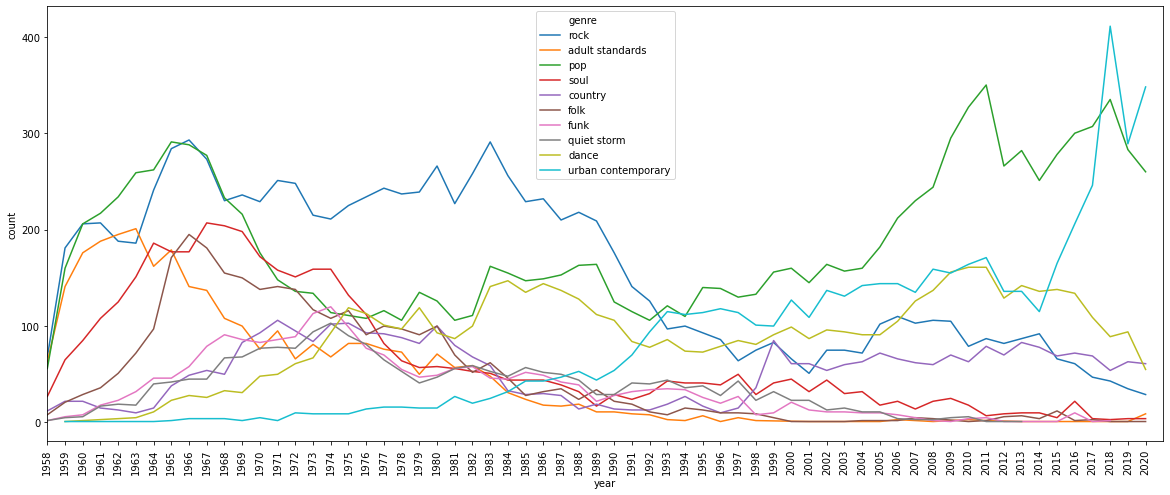

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xlim(1958,2021)
ax.set_xticks(years)
chart = sns.lineplot(x="year", y="count",hue="genre", data=df_genres_10);
plt.setp(chart.get_xticklabels(),rotation=90);

In [18]:
select_type = alt.selection(type="single",encodings=["x"])

line_genres = alt.Chart(df_genres_10).mark_line().encode(
    x='year:T',
    y='count',
    color='genre'
).properties(
    width=650,
    height=300,
).interactive().transform_filter(select_type)

bar_genres = alt.Chart(df_count_genres_10).mark_bar().encode(
    x="genre",
    y="count",
    color="genre"
).add_selection(select_type)

chart_genres = (bar_genres|line_genres)

In [19]:
chart_genres

alt.HConcatChart(...)

Esta gráfica es bastante interesante, ya que podemos extraer información muy relevante.

## Colaboraciones
- A continuación, se mostrará la evolución de las colaboraciones en los *hits* a lo largo del tiempo.

In [39]:
print (df_hits_uniq["collaboration"].value_counts())

False    22238
True      3332
Name: collaboration, dtype: int64


In [40]:
print (df_hits_uniq.groupby("year_chart").sum().sort_values('collaboration',ascending=False).iloc[:]["collaboration"])

year_chart
2018    231
2020    205
2019    188
2017    181
2011    146
       ... 
1958     13
1985     12
1981     12
1982     11
1979     11
Name: collaboration, Length: 63, dtype: int64


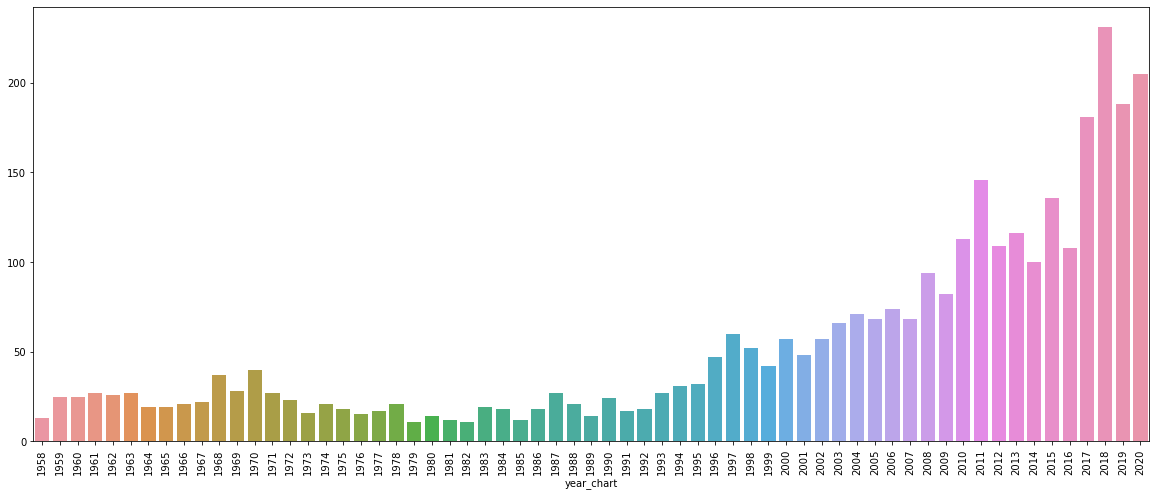

In [41]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
hits_bar_data = df_hits_uniq.groupby("year_chart").sum().sort_values('collaboration',ascending=False).iloc[:]["collaboration"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [45]:
df_collabs_time = hits_bar_data.to_frame()
df_collabs_time.reset_index(inplace=True)
df_collabs_time.to_csv('../Data/collabs_time.csv',index = False, header=True)

In [47]:
print (df_hits_uniq.groupby("artist").sum().sort_values('collaboration',ascending=False).iloc[:10]["collaboration"])

artist
Drake          51
Lil Wayne      38
Glee Cast      34
JAY-Z          30
Kanye West     29
DJ Khaled      29
Eminem         29
Meek Mill      27
Future         24
Chris Brown    22
Name: collaboration, dtype: int64


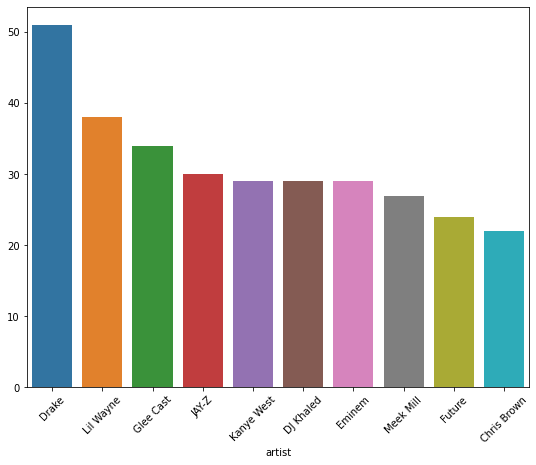

In [48]:
hits_bar_data = df_hits_uniq.groupby("artist").sum().sort_values('collaboration',ascending=False).iloc[:10]["collaboration"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [49]:
df_collabs_artists = hits_bar_data.to_frame()
df_collabs_artists.reset_index(inplace=True)
df_collabs_artists.to_csv('../Data/artists_collabs_hits.csv',index = False, header=True)

In [51]:
for index, value in hits_bar_data.iteritems():
    print ("Artist: ",index,"--> genres:" ,df_hits_uniq.loc[(df_hits_uniq["artist"]==index).idxmax(),"genres"])

Artist:  Drake --> genres: ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
Artist:  Lil Wayne --> genres: ['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
Artist:  Glee Cast --> genres: ['glee club', 'hollywood', 'post-teen pop', 'viral pop']
Artist:  JAY-Z --> genres: ['east coast hip hop', 'hip hop', 'pop rap', 'rap']
Artist:  Kanye West --> genres: ['chicago rap', 'rap']
Artist:  DJ Khaled --> genres: ['dance pop', 'dirty south rap', 'hip hop', 'miami hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'urban contemporary']
Artist:  Eminem --> genres: ['detroit hip hop', 'hip hop', 'rap']
Artist:  Meek Mill --> genres: ['hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
Artist:  Future --> genres: ['atl hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
Artist:  Chris Brown --> genres: ['dance pop', 'pop', 'pop rap', 'r&b', 'rap']


## Álbumes con más hits
- A continuación se obtendrán los álbumes con más *hits*.

In [51]:
print (df_hits_uniq.groupby(["album","artist"]).count().sort_values('title',ascending=False).iloc[:30]["title"])

album                                                         artist          
Gold                                                          Connie Francis      35
Glee: The Music, The Complete Season Three                    Glee Cast           32
Glee: The Music, The Complete Season Two                      Glee Cast           30
Scorpion                                                      Drake               25
More Life                                                     Drake               22
Tha Carter V                                                  Lil Wayne           21
The Complete Original Chart Hits 1964-1969                    Ronnie Dove         20
Greatest Hits: The Mercury Years                              Brook Benton        20
Views                                                         Drake               19
beerbongs & bentleys                                          Post Malone         18
25 All-Time Greatest Hits                                     Johnny Ti

In [52]:
s_albums_hit = df_hits_uniq.groupby(["album","artist"]).count().sort_values('title',ascending=False).iloc[:30]["title"]

In [53]:
s_albums_clean = s_albums_hit.drop(labels=[s_albums_hit.index[0],
                                            s_albums_hit.index[6],
                                            s_albums_hit.index[7],
                                            s_albums_hit.index[10],
                                            s_albums_hit.index[12],
                                            s_albums_hit.index[14],
                                            s_albums_hit.index[16],
                                            s_albums_hit.index[18],
                                            s_albums_hit.index[20],
                                            s_albums_hit.index[24],
                                            s_albums_hit.index[25],
                                            s_albums_hit.index[27]])

In [54]:
print(s_albums_clean)

album                                       artist      
Glee: The Music, The Complete Season Three  Glee Cast       32
Glee: The Music, The Complete Season Two    Glee Cast       30
Scorpion                                    Drake           25
More Life                                   Drake           22
Tha Carter V                                Lil Wayne       21
Views                                       Drake           19
beerbongs & bentleys                        Post Malone     18
Starboy                                     The Weeknd      18
Shoot For The Stars Aim For The Moon        Pop Smoke       17
Lover                                       Taylor Swift    17
ASTROWORLD                                  Travis Scott    17
Glee: The Music, Volume 3 Showstoppers      Glee Cast       17
Eternal Atake                               Lil Uzi Vert    16
Glee: The Music, Volume 4                   Glee Cast       16
Hollywood's Bleeding                        Post Malone     1

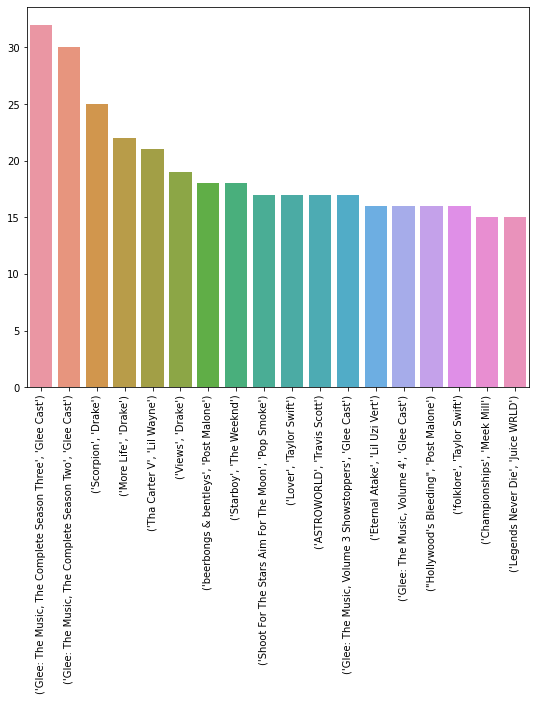

In [55]:
chart = sns.barplot(s_albums_clean.index, s_albums_clean.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [70]:
df_albums_hits = s_albums_clean.to_frame()
df_albums_hits.reset_index(inplace=True)
df_albums_hits.to_csv('../Data/top_albums_hits.csv',index = False, header=True)